In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 50)

import os
# Use this to see how much memory the dataframes use
from sys import getsizeof

import yaml

import pseudopeople as pp
from pseudopeople.configuration import get_configuration
from vivarium.framework.randomness import RandomnessStream
from vivarium.config_tree import ConfigTree

from vivarium_research_prl.utils import sizemb, MappingViaAttributes
from vivarium_research_prl import datatypes, alpha, data_loading
from vivarium_research_prl.noise import corruption, fake_names, noisify
from vivarium_research_prl.find_kids import datasets, noisify_data

!date
!whoami
!uname -a
!pwd

Fri 14 Apr 2023 02:21:06 PM PDT
ndbs
Linux gen-slurm-sarchive-p0016 5.4.0-135-generic #152-Ubuntu SMP Wed Nov 23 20:19:22 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux
/mnt/share/code/ndbs/vivarium_research_prl/pseudopeople_testing


In [83]:
from vivarium_research_prl import data_loading

In [12]:
%load_ext autoreload
%autoreload 2

# Load sample census

In [2]:
df_census_sample = pp.generate_decennial_census()
df_census_sample

2023-04-14 14:56:46.073 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/share/homes/ndbs/miniconda3/envs/prlpy38/lib/python3.8/site-packages/pseudopeople/data/sample_forms/decennial_census_observer/decennial_census_observer.parquet.


Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 22.19type/s]


simulant_id first_name middle_initial  last_name age date_of_birth  \
0            0_2    Melanie              L     Herrod  26    08/05/1993   
1            0_3     Jordan              C     Herrod  26    12/29/1993   
2          0_923       John              E      Davis  77    06/29/1942   
3         0_2641     Sharon              T    Plummer  59    10/10/1960   
4         0_2801     Ronnie              A     Yoakum  73    12/05/1946   
...          ...        ...            ...        ...  ..           ...   
9639     0_19008      James              G    Johnson  56    06/12/1963   
9640     0_20161   Nannette              D    Mckenna  61    11/09/1958   
9641     0_20162    Cynthia              L    Mckenna  65    01/20/1955   
9642     0_19669     Marcus              A  Underwood  59    10/06/1960   
9643     0_20160      Kelly              A     Parris  26    10/24/1993   

     street_number           street_name unit_number     city state zipcode  \
0            10233  north burgher avenue              Anytown    US   00000   
1            10233  north burgher avenue              Anytown    US   00000   
2          147-153          browning ave              Anytown    US   00000   
3              107           stallion st              Anytown    US   00000   
4              214           s vine lane              Anytown    US   00000   
...            ...                   ...         ...      ...   ...     ...   
9639           691        sunny crest ln              Anytown    US   00000   
9640          6132                n pine              Anytown    US   00000   
9641          6132                n pine              Anytown    US   00000   
9642          1724              lodi way              Anytown    US   00000   
9643          2203           blume st ne              Anytown    US   00000   

     relation_to_household_head     sex race_ethnicity  
0              Reference person  Female          White  
1                Other relative  Female          White  
2              Reference person    Male          Black  
3              Reference person  Female          White  
4              Reference person    Male          White  
...                         ...     ...            ...  
9639           Reference person    Male          Black  
9640           Reference person  Female          White  
9641            Same-sex spouse  Female          White  
9642           Reference person    Male            NaN  
9643           Reference person  Female          White  

[9644 rows x 15 columns]

In [3]:
df_census_sample.unit_number.isna().sum()

9

In [8]:
(df_census_sample.unit_number == '').sum()

9080

In [7]:
df_census_sample.unit_number.value_counts(dropna=False)

                   9080
basement              9
NaN                   9
floor 3               8
8th lvl apt 821       7
                   ... 
no 221r               1
no 421r               1
lvl num 8             1
no 12 floor           1
apt 53                1
Name: unit_number, Length: 233, dtype: int64

In [9]:
config = get_configuration()
config

decennial_census:
    row_noise:
        omission:
            probability:
                default: 0.0145
                    source: None
                baseline: 0.0
                    source: None
    column_noise:
        first_name:
            missing_data:
                probability:
                    baseline: 0.01
                        source: None
            fake_name:
                probability:
                    baseline: 0.01
                        source: None
                token_noise_level:
                    baseline: 0.1
                        source: None
            typographic:
                probability:
                    baseline: 0.01
                        source: None
                token_noise_level:
                    baseline: 0.1
                        source: None
                include_original_token_level:
                    baseline: 0.1
                        source: None
        middle_initial:
            missing_data:
  

In [33]:
zero_col_config = alpha.get_zero_noise_config('column')
zero_col_config.decennial_census

row_noise:
    omission:
        probability:
            default: 0.0145
                source: None
            baseline: 0.0
                source: None
column_noise:
    first_name:
        missing_data:
            probability:
                user: 0
                    source: None
                baseline: 0.01
                    source: None
        fake_name:
            probability:
                user: 0
                    source: None
                baseline: 0.01
                    source: None
            token_noise_level:
                baseline: 0.1
                    source: None
        typographic:
            probability:
                user: 0
                    source: None
                baseline: 0.01
                    source: None
            token_noise_level:
                baseline: 0.1
                    source: None
            include_original_token_level:
                baseline: 0.1
                    source: None
    middle_initial:

In [30]:
df_census_sample0 = pp.generate_decennial_census(configuration=zero_col_config.to_dict())
df_census_sample0

2023-04-14 15:22:33.070 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/share/homes/ndbs/miniconda3/envs/prlpy38/lib/python3.8/site-packages/pseudopeople/data/sample_forms/decennial_census_observer/decennial_census_observer.parquet.


Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 112.13type/s]


simulant_id first_name middle_initial  last_name age date_of_birth  \
0            0_2    Melanie              L     Herrod  26    08/05/1993   
1            0_3     Jordan              C     Herrod  26    12/29/1993   
2          0_923       John              E      Davis  77    06/29/1942   
3         0_2641     Sharon              T    Plummer  59    10/10/1960   
4         0_2801     Ronnie              A     Yoakum  73    12/05/1946   
...          ...        ...            ...        ...  ..           ...   
9639     0_19008      James              G    Johnson  56    06/12/1963   
9640     0_20161   Nannette              D    Mckenna  61    11/09/1958   
9641     0_20162    Cynthia              L    Mckenna  65    01/20/1955   
9642     0_19669     Marcus              A  Underwood  59    10/06/1960   
9643     0_20160      Kelly              A     Parris  26    10/24/1993   

     street_number           street_name unit_number     city state zipcode  \
0            10233  north burgher avenue              Anytown    US   00000   
1            10233  north burgher avenue              Anytown    US   00000   
2          147-153          browning ave              Anytown    US   00000   
3              107           stallion st              Anytown    US   00000   
4              214           s vine lane              Anytown    US   00000   
...            ...                   ...         ...      ...   ...     ...   
9639           691        sunny crest ln              Anytown    US   00000   
9640          6132                n pine              Anytown    US   00000   
9641          6132                n pine              Anytown    US   00000   
9642          1724              lodi way              Anytown    US   00000   
9643          2203           blume st ne              Anytown    US   00000   

     relation_to_household_head     sex race_ethnicity  
0              Reference person  Female          White  
1                Other relative  Female          White  
2              Reference person    Male          Black  
3              Reference person  Female          White  
4              Reference person    Male          White  
...                         ...     ...            ...  
9639           Reference person    Male          Black  
9640           Reference person  Female          White  
9641            Same-sex spouse  Female          White  
9642           Reference person    Male          Black  
9643           Reference person  Female          White  

[9644 rows x 15 columns]

In [31]:
df_census_sample.simulant_id.equals(df_census_sample0.simulant_id)

True

In [34]:
zero_config = alpha.get_zero_noise_config('both')
zero_config.decennial_census

row_noise:
    omission:
        probability:
            user: 0
                source: None
            default: 0.0145
                source: None
            baseline: 0.0
                source: None
column_noise:
    first_name:
        missing_data:
            probability:
                user: 0
                    source: None
                baseline: 0.01
                    source: None
        fake_name:
            probability:
                user: 0
                    source: None
                baseline: 0.01
                    source: None
            token_noise_level:
                baseline: 0.1
                    source: None
        typographic:
            probability:
                user: 0
                    source: None
                baseline: 0.01
                    source: None
            token_noise_level:
                baseline: 0.1
                    source: None
            include_original_token_level:
                baseline: 0.1
   

In [36]:
df_census_sample00 = pp.generate_decennial_census(configuration=zero_config.to_dict())
df_census_sample00

2023-04-14 15:23:52.638 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/share/homes/ndbs/miniconda3/envs/prlpy38/lib/python3.8/site-packages/pseudopeople/data/sample_forms/decennial_census_observer/decennial_census_observer.parquet.


Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 126.54type/s]


simulant_id first_name middle_initial  last_name age date_of_birth  \
0            0_2    Melanie              L     Herrod  26    08/05/1993   
1            0_3     Jordan              C     Herrod  26    12/29/1993   
2          0_923       John              E      Davis  77    06/29/1942   
3         0_2641     Sharon              T    Plummer  59    10/10/1960   
4         0_2801     Ronnie              A     Yoakum  73    12/05/1946   
...          ...        ...            ...        ...  ..           ...   
9781     0_19008      James              G    Johnson  56    06/12/1963   
9782     0_20161   Nannette              D    Mckenna  61    11/09/1958   
9783     0_20162    Cynthia              L    Mckenna  65    01/20/1955   
9784     0_19669     Marcus              A  Underwood  59    10/06/1960   
9785     0_20160      Kelly              A     Parris  26    10/24/1993   

     street_number           street_name unit_number     city state zipcode  \
0            10233  north burgher avenue              Anytown    US   00000   
1            10233  north burgher avenue              Anytown    US   00000   
2          147-153          browning ave              Anytown    US   00000   
3              107           stallion st              Anytown    US   00000   
4              214           s vine lane              Anytown    US   00000   
...            ...                   ...         ...      ...   ...     ...   
9781           691        sunny crest ln              Anytown    US   00000   
9782          6132                n pine              Anytown    US   00000   
9783          6132                n pine              Anytown    US   00000   
9784          1724              lodi way              Anytown    US   00000   
9785          2203           blume st ne              Anytown    US   00000   

     relation_to_household_head     sex race_ethnicity  
0              Reference person  Female          White  
1                Other relative  Female          White  
2              Reference person    Male          Black  
3              Reference person  Female          White  
4              Reference person    Male          White  
...                         ...     ...            ...  
9781           Reference person    Male          Black  
9782           Reference person  Female          White  
9783            Same-sex spouse  Female          White  
9784           Reference person    Male          Black  
9785           Reference person  Female          White  

[9786 rows x 15 columns]

In [40]:
missing_sim_ids = set(df_census_sample00.simulant_id).difference(df_census_sample.simulant_id)
len(missing_sim_ids)

142

<AxesSubplot: >

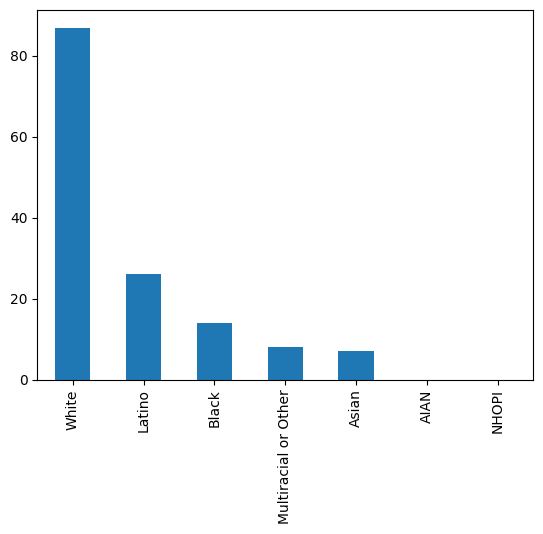

In [44]:
df_census_sample00.query("simulant_id in @missing_sim_ids").race_ethnicity.value_counts().plot.bar()

<AxesSubplot: >

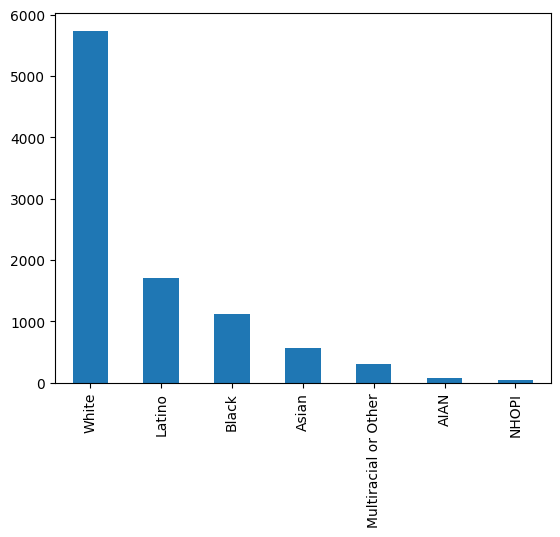

In [45]:
df_census_sample.race_ethnicity.value_counts().plot.bar()

<AxesSubplot: >

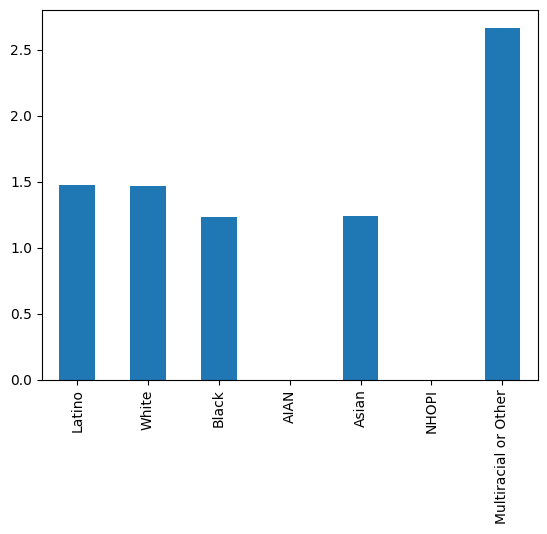

In [46]:
df_missing_rows = df_census_sample00.query("simulant_id in @missing_sim_ids")
percent_missing_by_race = (
    100 * df_missing_rows.race_ethnicity.value_counts() / df_census_sample00.race_ethnicity.value_counts()
)
percent_missing_by_race.plot.bar()

<AxesSubplot: >

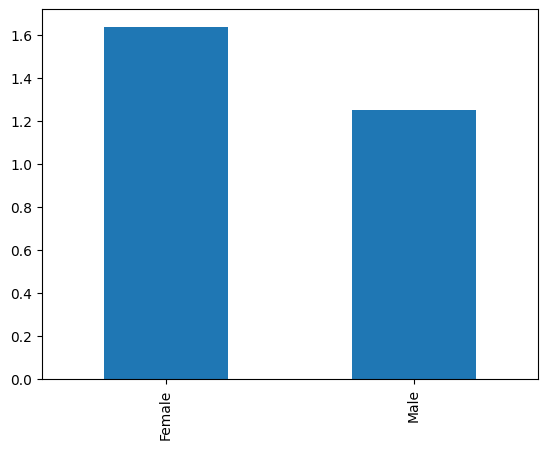

In [48]:
percent_missing_by_sex = (
    100 * df_missing_rows.sex.value_counts() / df_census_sample00.sex.value_counts()
)
percent_missing_by_sex.plot.bar()

# Data!

```
/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/
```

In [50]:
project_dir = '/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop'
model_dir = (
    f'{project_dir}/results'
    '/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04'
)
parquet_dir = f'{model_dir}/final_results/parquet'
hdf_dir = f'{model_dir}/final_results/hdf'
rhode_island_par_dir = f'{parquet_dir}/states/rhode_island'
usa_par_dir = f'{parquet_dir}/usa'
rhode_island_hdf_dir = f'{hdf_dir}/states/rhode_island'
usa_hdf_dir = f'{hdf_dir}/usa'

!ls -halt $hdf_dir

total 96K
drwxrwsr-x  3 rmudambi IHME-Simulationscience  512 Apr  9 18:49 states
drwxrwsr-x  5 rmudambi IHME-Simulationscience 1.5K Apr  9 18:49 .
drwxrwsr-x 10 rmudambi IHME-Simulationscience 4.0K Apr  9 15:35 usa
drwxrwsr-x  4 rmudambi IHME-Simulationscience 2.0K Apr  9 15:21 ..
drwxrwsr-x  2 rmudambi IHME-Simulationscience 335K Apr  9 11:55 logs


In [51]:
!ls -halt $rhode_island_hdf_dir

total 156K
drwxrwsr-x 2 rmudambi IHME-Simulationscience 108K Apr 10 18:43 tax_w2_observer
drwxrwsr-x 7 rmudambi IHME-Simulationscience 2.5K Apr  9 23:17 .
drwxrwsr-x 2 rmudambi IHME-Simulationscience 167K Apr  9 23:17 wic_observer
drwxrwsr-x 2 rmudambi IHME-Simulationscience 167K Apr  9 22:35 household_survey_observer_cps
drwxrwsr-x 2 rmudambi IHME-Simulationscience 167K Apr  9 22:01 household_survey_observer_acs
drwxrwsr-x 2 rmudambi IHME-Simulationscience 167K Apr  9 21:47 decennial_census_observer
drwxrwsr-x 3 rmudambi IHME-Simulationscience  512 Apr  9 18:49 ..


In [52]:
%%time
df_wic_noisy = pp.generate_women_infants_and_children(rhode_island_hdf_dir)
df_wic_noisy

2023-04-14 16:37:35.680 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/hdf/states/rhode_island/wic_observer/wic_observer_1074.hdf.


ValueError: The passed where expression: [year == 2020.]
            contains an invalid variable reference
            all of the variable references must be a reference to
            an axis (e.g. 'index' or 'columns'), or a data_column
            The currently defined references are: index,columns


In [53]:
rhode_island_hdf_dir

'/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/hdf/states/rhode_island'

In [54]:
%%time
df_wic_noisy = pp.generate_women_infants_and_children(rhode_island_par_dir)
df_wic_noisy

2023-04-14 16:44:19.702 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6442.parquet.


Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.05type/s]

2023-04-14 16:44:20.126 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7137.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 112.66type/s]

2023-04-14 16:44:20.487 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7107.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 105.48type/s]

2023-04-14 16:44:20.844 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9653.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.12type/s]

2023-04-14 16:44:21.211 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5901.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 118.17type/s]

2023-04-14 16:44:21.562 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8134.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 108.67type/s]

2023-04-14 16:44:21.915 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1299.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.56type/s]

2023-04-14 16:44:22.298 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5892.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 70.52type/s]

2023-04-14 16:44:22.687 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4943.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 103.25type/s]

2023-04-14 16:44:23.040 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_93.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 208.35type/s]

2023-04-14 16:44:23.351 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7511.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 118.56type/s]

2023-04-14 16:44:23.698 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8838.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 94.72type/s]

2023-04-14 16:44:24.065 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7530.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 114.07type/s]

2023-04-14 16:44:24.420 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5439.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 68.87type/s]

2023-04-14 16:44:24.832 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2989.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 119.73type/s]

2023-04-14 16:44:25.181 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_778.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 157.46type/s]

2023-04-14 16:44:25.513 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9772.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.84type/s]

2023-04-14 16:44:25.902 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3725.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.63type/s]

2023-04-14 16:44:26.272 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9187.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.93type/s]

2023-04-14 16:44:26.636 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5159.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 81.45type/s]

2023-04-14 16:44:27.014 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7264.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 74.57type/s]

2023-04-14 16:44:27.402 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9901.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 122.00type/s]

2023-04-14 16:44:27.751 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4400.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 98.30type/s]

2023-04-14 16:44:28.109 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4192.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 111.79type/s]

2023-04-14 16:44:28.457 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4922.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 103.96type/s]

2023-04-14 16:44:28.823 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6751.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.94type/s]

2023-04-14 16:44:29.224 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8133.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 115.04type/s]

2023-04-14 16:44:29.586 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7870.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 115.93type/s]

2023-04-14 16:44:29.936 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7438.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 98.16type/s]

2023-04-14 16:44:30.304 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1559.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 148.64type/s]

2023-04-14 16:44:30.639 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9526.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 142.48type/s]

2023-04-14 16:44:30.976 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6324.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 160.75type/s]

2023-04-14 16:44:31.325 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3465.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 66.03type/s]

2023-04-14 16:44:31.722 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5150.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.99type/s]

2023-04-14 16:44:32.100 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3298.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 104.58type/s]

2023-04-14 16:44:32.482 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1832.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.52type/s]

2023-04-14 16:44:32.852 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9024.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 141.79type/s]

2023-04-14 16:44:33.188 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6975.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 127.89type/s]

2023-04-14 16:44:33.517 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2500.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 98.30type/s]

2023-04-14 16:44:33.896 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7086.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 104.02type/s]

2023-04-14 16:44:34.256 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_656.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.50type/s]

2023-04-14 16:44:34.628 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6007.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.56type/s]

2023-04-14 16:44:35.020 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_682.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.52type/s]

2023-04-14 16:44:35.416 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5399.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.48type/s]

2023-04-14 16:44:35.794 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6760.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 55.69type/s]

2023-04-14 16:44:36.222 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5797.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 138.03type/s]

2023-04-14 16:44:36.567 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2047.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 105.69type/s]

2023-04-14 16:44:36.919 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3377.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 98.83type/s]

2023-04-14 16:44:37.291 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2229.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 186.85type/s]

2023-04-14 16:44:37.602 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5685.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100.38type/s]

2023-04-14 16:44:37.965 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1990.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.03type/s]

2023-04-14 16:44:38.330 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2808.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.59type/s]

2023-04-14 16:44:38.727 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5628.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 204.89type/s]

2023-04-14 16:44:39.045 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5875.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 109.01type/s]

2023-04-14 16:44:39.415 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_781.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.61type/s]

2023-04-14 16:44:39.804 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1482.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 85.07type/s]

2023-04-14 16:44:40.181 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3304.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 93.71type/s]

2023-04-14 16:44:40.549 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1177.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 119.74type/s]

2023-04-14 16:44:40.893 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4123.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.30type/s]

2023-04-14 16:44:41.266 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2863.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.54type/s]

2023-04-14 16:44:41.668 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3305.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.02type/s]

2023-04-14 16:44:42.034 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_821.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 101.81type/s]

2023-04-14 16:44:42.393 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1452.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.10type/s]

2023-04-14 16:44:42.783 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4622.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 104.59type/s]

2023-04-14 16:44:43.139 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1648.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 139.24type/s]

2023-04-14 16:44:43.475 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9284.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 163.24type/s]

2023-04-14 16:44:43.805 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4202.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 237.82type/s]

2023-04-14 16:44:44.123 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9971.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 66.86type/s]

2023-04-14 16:44:44.530 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7179.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.15type/s]

2023-04-14 16:44:44.913 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6790.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.53type/s]

2023-04-14 16:44:45.289 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_103.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 121.16type/s]

2023-04-14 16:44:45.641 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2700.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 121.74type/s]

2023-04-14 16:44:46.003 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3374.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 105.99type/s]

2023-04-14 16:44:46.373 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_323.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.29type/s]

2023-04-14 16:44:46.743 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2416.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 74.11type/s]

2023-04-14 16:44:47.157 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5440.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.44type/s]

2023-04-14 16:44:47.539 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_28.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 113.20type/s]

2023-04-14 16:44:47.920 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7342.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.69type/s]

2023-04-14 16:44:48.309 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2311.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 59.17type/s]

2023-04-14 16:44:48.735 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9643.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 94.00type/s]

2023-04-14 16:44:49.099 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7359.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.37type/s]

2023-04-14 16:44:49.502 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4672.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.60type/s]

2023-04-14 16:44:49.886 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1200.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72.95type/s]

2023-04-14 16:44:50.281 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3454.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 96.66type/s]

2023-04-14 16:44:50.655 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1777.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 66.88type/s]

2023-04-14 16:44:51.070 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_99.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.70type/s]

2023-04-14 16:44:51.835 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9872.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.95type/s]

2023-04-14 16:44:52.273 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1917.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 117.33type/s]

2023-04-14 16:44:52.645 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7589.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 57.13type/s]

2023-04-14 16:44:53.170 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6519.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 50.77type/s]

2023-04-14 16:44:53.736 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5863.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 97.37type/s]

2023-04-14 16:44:54.139 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7850.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 60.86type/s]

2023-04-14 16:44:54.646 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_352.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 60.58type/s]

2023-04-14 16:44:55.085 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7551.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 105.33type/s]

2023-04-14 16:44:55.512 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8734.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 135.62type/s]

2023-04-14 16:44:55.896 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7653.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 126.54type/s]

2023-04-14 16:44:56.245 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9402.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 96.80type/s]

2023-04-14 16:44:56.619 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1508.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 134.93type/s]

2023-04-14 16:44:56.969 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5950.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 207.90type/s]

2023-04-14 16:44:57.300 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4507.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 59.35type/s]

2023-04-14 16:44:57.718 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3621.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 123.02type/s]

2023-04-14 16:44:58.080 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5475.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 70.70type/s]

2023-04-14 16:44:58.496 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9588.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 132.59type/s]

2023-04-14 16:44:58.834 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6874.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 150.73type/s]

2023-04-14 16:44:59.182 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5860.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.48type/s]

2023-04-14 16:44:59.556 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9696.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 112.00type/s]

2023-04-14 16:44:59.915 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7054.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.12type/s]

2023-04-14 16:45:00.295 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_734.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.83type/s]

2023-04-14 16:45:00.688 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7016.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.47type/s]

2023-04-14 16:45:01.081 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9549.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 112.69type/s]

2023-04-14 16:45:01.448 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4941.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 123.54type/s]

2023-04-14 16:45:01.793 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3793.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 139.21type/s]

2023-04-14 16:45:02.138 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1282.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 94.03type/s]

2023-04-14 16:45:02.507 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4904.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 103.12type/s]

2023-04-14 16:45:02.884 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2787.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72.40type/s]

2023-04-14 16:45:03.297 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6991.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 117.33type/s]

2023-04-14 16:45:03.648 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9367.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.64type/s]

2023-04-14 16:45:04.038 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_446.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.93type/s]

2023-04-14 16:45:04.416 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9159.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 101.30type/s]

2023-04-14 16:45:04.779 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1753.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 111.76type/s]

2023-04-14 16:45:05.145 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2689.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71.52type/s]

2023-04-14 16:45:05.548 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1935.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 81.09type/s]

2023-04-14 16:45:05.929 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7927.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.96type/s]

2023-04-14 16:45:06.300 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7292.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 157.26type/s]

2023-04-14 16:45:06.639 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_539.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 114.40type/s]

2023-04-14 16:45:07.001 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8877.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 103.65type/s]

2023-04-14 16:45:07.371 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_338.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71.63type/s]

2023-04-14 16:45:07.766 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9911.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100.28type/s]

2023-04-14 16:45:08.140 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8425.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 96.44type/s]

2023-04-14 16:45:08.523 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7817.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 116.06type/s]

2023-04-14 16:45:08.893 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3326.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 81.47type/s]

2023-04-14 16:45:09.286 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7164.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 163.10type/s]

2023-04-14 16:45:09.624 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3545.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100.32type/s]

2023-04-14 16:45:09.987 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4260.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.69type/s]

2023-04-14 16:45:10.385 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9434.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.76type/s]

2023-04-14 16:45:10.769 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3142.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 57.46type/s]

2023-04-14 16:45:11.209 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5188.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 122.90type/s]

2023-04-14 16:45:11.560 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6929.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.52type/s]

2023-04-14 16:45:11.929 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5072.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 97.56type/s]

2023-04-14 16:45:12.300 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9723.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.81type/s]

2023-04-14 16:45:12.690 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3481.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 106.53type/s]

2023-04-14 16:45:13.066 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3591.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 136.82type/s]

2023-04-14 16:45:13.415 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1933.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 119.88type/s]

2023-04-14 16:45:13.762 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5548.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71.12type/s]

2023-04-14 16:45:14.166 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4802.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.50type/s]

2023-04-14 16:45:14.551 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3994.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 114.77type/s]

2023-04-14 16:45:14.911 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2284.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 120.12type/s]

2023-04-14 16:45:15.269 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9888.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 118.30type/s]

2023-04-14 16:45:15.628 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1154.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.06type/s]

2023-04-14 16:45:16.016 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1232.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 74.08type/s]

2023-04-14 16:45:16.423 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_278.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 57.34type/s]

2023-04-14 16:45:16.851 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8305.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 111.61type/s]

2023-04-14 16:45:17.223 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6079.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.79type/s]

2023-04-14 16:45:17.601 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6118.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 75.60type/s]

2023-04-14 16:45:17.996 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5348.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 101.12type/s]

2023-04-14 16:45:18.363 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7275.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 103.98type/s]

2023-04-14 16:45:18.730 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8192.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 105.66type/s]

2023-04-14 16:45:19.089 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6606.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 110.18type/s]

2023-04-14 16:45:19.450 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5501.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 74.89type/s]

2023-04-14 16:45:19.853 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3723.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 118.48type/s]

2023-04-14 16:45:20.214 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3254.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.05type/s]

2023-04-14 16:45:20.587 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_315.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.44type/s]

2023-04-14 16:45:20.959 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3066.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.69type/s]

2023-04-14 16:45:21.332 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9272.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 175.79type/s]

2023-04-14 16:45:21.665 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8755.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 67.06type/s]

2023-04-14 16:45:22.079 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6123.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.95type/s]

2023-04-14 16:45:22.458 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4255.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 67.02type/s]

2023-04-14 16:45:22.866 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1219.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.31type/s]

2023-04-14 16:45:23.256 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5398.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 158.01type/s]

2023-04-14 16:45:23.601 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8980.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.81type/s]

2023-04-14 16:45:23.989 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_107.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 129.42type/s]

2023-04-14 16:45:24.346 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_558.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.05type/s]

2023-04-14 16:45:24.726 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5393.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.28type/s]

2023-04-14 16:45:25.105 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2477.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 93.16type/s]

2023-04-14 16:45:25.480 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8628.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 107.44type/s]

2023-04-14 16:45:25.854 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5698.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.55type/s]

2023-04-14 16:45:26.235 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6701.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.49type/s]

2023-04-14 16:45:26.640 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5969.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 156.23type/s]

2023-04-14 16:45:26.980 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2298.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 183.20type/s]

2023-04-14 16:45:27.302 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6207.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.64type/s]

2023-04-14 16:45:27.681 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4496.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 107.29type/s]

2023-04-14 16:45:28.044 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3938.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 141.21type/s]

2023-04-14 16:45:28.385 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5246.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.75type/s]

2023-04-14 16:45:28.779 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3380.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.01type/s]

2023-04-14 16:45:29.182 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4637.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 113.11type/s]

2023-04-14 16:45:29.543 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1534.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 121.20type/s]

2023-04-14 16:45:29.901 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4528.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 117.01type/s]

2023-04-14 16:45:30.255 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9804.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.96type/s]

2023-04-14 16:45:30.654 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4203.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 109.88type/s]

2023-04-14 16:45:31.016 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5703.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.67type/s]

2023-04-14 16:45:31.378 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6793.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 97.12type/s]

2023-04-14 16:45:31.771 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7594.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 108.65type/s]

2023-04-14 16:45:32.135 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5300.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.65type/s]

2023-04-14 16:45:32.517 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1490.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 68.65type/s]

2023-04-14 16:45:32.923 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1182.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 101.92type/s]

2023-04-14 16:45:33.294 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2461.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 129.13type/s]

2023-04-14 16:45:33.646 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4938.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.33type/s]

2023-04-14 16:45:34.046 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4369.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 110.77type/s]

2023-04-14 16:45:34.406 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5004.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.57type/s]

2023-04-14 16:45:34.790 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3624.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 131.54type/s]

2023-04-14 16:45:35.146 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9244.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.71type/s]

2023-04-14 16:45:35.540 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1235.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.58type/s]

2023-04-14 16:45:35.915 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3093.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.75type/s]

2023-04-14 16:45:36.295 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9577.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 97.68type/s]

2023-04-14 16:45:36.668 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5020.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.29type/s]

2023-04-14 16:45:37.056 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1007.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 121.14type/s]

2023-04-14 16:45:37.414 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6778.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 111.77type/s]

2023-04-14 16:45:37.780 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2448.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 138.90type/s]

2023-04-14 16:45:38.131 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5114.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 107.18type/s]

2023-04-14 16:45:38.498 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5781.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 109.45type/s]

2023-04-14 16:45:38.860 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_40.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.72type/s]

2023-04-14 16:45:39.248 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_496.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 119.48type/s]

2023-04-14 16:45:39.603 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8509.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 111.12type/s]

2023-04-14 16:45:39.967 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3585.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 85.64type/s]

2023-04-14 16:45:40.356 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5831.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 170.60type/s]

2023-04-14 16:45:40.701 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8501.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 94.98type/s]

2023-04-14 16:45:41.091 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5670.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 193.43type/s]

2023-04-14 16:45:41.426 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1897.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.31type/s]

2023-04-14 16:45:41.801 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8291.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 110.18type/s]

2023-04-14 16:45:42.167 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_432.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.99type/s]

2023-04-14 16:45:42.539 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8527.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 59.33type/s]

2023-04-14 16:45:42.966 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4344.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.30type/s]

2023-04-14 16:45:43.359 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9292.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 112.13type/s]

2023-04-14 16:45:43.728 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3528.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 85.21type/s]

2023-04-14 16:45:44.111 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2405.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 177.37type/s]

2023-04-14 16:45:44.446 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_771.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71.20type/s]

2023-04-14 16:45:44.851 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8817.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 139.30type/s]

2023-04-14 16:45:45.209 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5812.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 75.51type/s]

2023-04-14 16:45:45.611 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3632.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 127.04type/s]

2023-04-14 16:45:45.968 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3541.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 117.80type/s]

2023-04-14 16:45:46.328 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6817.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.68type/s]

2023-04-14 16:45:46.703 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_440.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.02type/s]

2023-04-14 16:45:47.099 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2476.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 68.81type/s]

2023-04-14 16:45:47.511 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6654.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.25type/s]

2023-04-14 16:45:47.896 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9247.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.06type/s]

2023-04-14 16:45:48.274 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5046.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 216.62type/s]

2023-04-14 16:45:48.600 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7384.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 75.26type/s]

2023-04-14 16:45:49.002 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_860.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.81type/s]

2023-04-14 16:45:49.394 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1362.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.48type/s]

2023-04-14 16:45:49.774 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3776.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 110.93type/s]

2023-04-14 16:45:50.136 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8516.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 98.43type/s]

2023-04-14 16:45:50.589 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_494.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.30type/s]

2023-04-14 16:45:50.978 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1356.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.87type/s]

2023-04-14 16:45:51.705 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1483.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 101.32type/s]

2023-04-14 16:45:52.092 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5594.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.14type/s]

2023-04-14 16:45:52.492 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3731.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 102.11type/s]

2023-04-14 16:45:52.866 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3598.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 93.35type/s]

2023-04-14 16:45:53.243 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8221.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.21type/s]

2023-04-14 16:45:53.651 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6090.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 141.28type/s]

2023-04-14 16:45:54.005 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7645.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 127.76type/s]

2023-04-14 16:45:54.363 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_131.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 109.36type/s]

2023-04-14 16:45:54.733 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1061.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 96.66type/s]

2023-04-14 16:45:55.114 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7745.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 104.42type/s]

2023-04-14 16:45:55.497 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7125.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 103.56type/s]

2023-04-14 16:45:55.862 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6982.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.75type/s]

2023-04-14 16:45:56.262 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3684.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.28type/s]

2023-04-14 16:45:56.653 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1069.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 125.87type/s]

2023-04-14 16:45:57.001 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1597.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100.71type/s]

2023-04-14 16:45:57.382 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3586.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71.75type/s]

2023-04-14 16:45:57.802 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8641.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.23type/s]

2023-04-14 16:45:58.196 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9672.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.55type/s]

2023-04-14 16:45:58.612 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9776.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.03type/s]

2023-04-14 16:45:58.993 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7938.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 108.81type/s]

2023-04-14 16:45:59.365 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2965.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.81type/s]

2023-04-14 16:45:59.744 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9225.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 112.04type/s]

2023-04-14 16:46:00.104 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1632.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 144.08type/s]

2023-04-14 16:46:00.448 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3202.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 117.92type/s]

2023-04-14 16:46:00.807 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1562.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72.92type/s]

2023-04-14 16:46:01.218 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9740.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.48type/s]

2023-04-14 16:46:01.624 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3978.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 104.39type/s]

2023-04-14 16:46:01.995 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9847.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 105.15type/s]

2023-04-14 16:46:02.369 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3595.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.70type/s]

2023-04-14 16:46:02.767 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8360.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 190.68type/s]

2023-04-14 16:46:03.107 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6800.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 109.41type/s]

2023-04-14 16:46:03.475 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3390.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 122.04type/s]

2023-04-14 16:46:03.841 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4621.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.53type/s]

2023-04-14 16:46:04.233 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3947.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 106.02type/s]

2023-04-14 16:46:04.604 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9066.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.83type/s]

2023-04-14 16:46:04.995 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5949.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.77type/s]

2023-04-14 16:46:05.400 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9768.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.89type/s]

2023-04-14 16:46:05.793 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9871.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 122.55type/s]

2023-04-14 16:46:06.167 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6455.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.61type/s]

2023-04-14 16:46:06.544 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6144.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 132.87type/s]

2023-04-14 16:46:06.899 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_974.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 60.85type/s]

2023-04-14 16:46:07.327 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9495.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 93.10type/s]

2023-04-14 16:46:07.714 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1667.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.78type/s]

2023-04-14 16:46:08.102 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3225.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.62type/s]

2023-04-14 16:46:08.483 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3607.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 75.31type/s]

2023-04-14 16:46:08.890 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7344.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.22type/s]

2023-04-14 16:46:09.264 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3789.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 119.29type/s]

2023-04-14 16:46:09.629 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1609.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 129.22type/s]

2023-04-14 16:46:09.997 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3167.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 120.10type/s]

2023-04-14 16:46:10.349 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3568.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.87type/s]

2023-04-14 16:46:10.745 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8612.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 57.50type/s]

2023-04-14 16:46:11.186 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5308.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 101.77type/s]

2023-04-14 16:46:11.576 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4561.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.42type/s]

2023-04-14 16:46:11.969 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6810.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72.70type/s]

2023-04-14 16:46:12.382 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6545.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.47type/s]

2023-04-14 16:46:12.781 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2277.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 93.24type/s]

2023-04-14 16:46:13.165 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4743.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 116.85type/s]

2023-04-14 16:46:13.521 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6191.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 109.49type/s]

2023-04-14 16:46:13.892 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8156.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 114.09type/s]

2023-04-14 16:46:14.260 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5616.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 89.87type/s]

2023-04-14 16:46:14.637 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2054.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100.24type/s]

2023-04-14 16:46:15.019 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_386.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 104.82type/s]

2023-04-14 16:46:15.383 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_478.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.38type/s]

2023-04-14 16:46:15.776 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6520.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 180.32type/s]

2023-04-14 16:46:16.122 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3984.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.31type/s]

2023-04-14 16:46:16.511 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3825.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.07type/s]

2023-04-14 16:46:16.929 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7303.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 97.84type/s]

2023-04-14 16:46:17.317 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9859.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 105.40type/s]

2023-04-14 16:46:17.696 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6203.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 135.20type/s]

2023-04-14 16:46:18.051 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8869.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.94type/s]

2023-04-14 16:46:18.440 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6487.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 70.19type/s]

2023-04-14 16:46:18.847 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1091.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 101.46type/s]

2023-04-14 16:46:19.225 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1614.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 126.41type/s]

2023-04-14 16:46:19.587 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6776.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.67type/s]

2023-04-14 16:46:19.970 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5619.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 106.18type/s]

2023-04-14 16:46:20.352 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_465.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 119.75type/s]

2023-04-14 16:46:20.715 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1074.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 81.97type/s]

2023-04-14 16:46:21.113 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2599.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.55type/s]

2023-04-14 16:46:21.498 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3240.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 131.93type/s]

2023-04-14 16:46:21.854 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6539.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 96.98type/s]

2023-04-14 16:46:22.239 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1655.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 122.76type/s]

2023-04-14 16:46:22.604 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4950.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.20type/s]

2023-04-14 16:46:23.028 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4649.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.58type/s]

2023-04-14 16:46:23.430 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3357.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 93.98type/s]

2023-04-14 16:46:23.805 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8997.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 109.11type/s]

2023-04-14 16:46:24.174 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9840.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.76type/s]

2023-04-14 16:46:24.594 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2721.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 94.75type/s]

2023-04-14 16:46:24.986 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8129.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 81.31type/s]

2023-04-14 16:46:25.389 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3713.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 124.38type/s]

2023-04-14 16:46:25.759 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7985.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 107.79type/s]

2023-04-14 16:46:26.139 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6554.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.96type/s]


CPU times: user 1min 58s, sys: 7.42 s, total: 2min 5s
Wall time: 2min 7s


household_id   simulant_id first_name middle_initial        last_name  \
0        6442_3740     6442_9340    Brianna              J             Bogy   
1       6442_38860    6442_96730     Olivia              A            Breed   
2       6442_42356   6442_105485   Courtney              V            Clark   
3       6442_71585   6442_178365   Margaret              K         Mcmullin   
4      6442_121427   6442_302306       GENT              J           Hughes   
...            ...           ...        ...            ...              ...   
14469  6554_191052  6554_1012651      Rosie              A           Bender   
14470   6554_28946  6554_1013618     Hallie              J          Fusillo   
14471  6554_145095  6554_1013845     Lauren              M            Munoz   
14472  6554_138156  6554_1016553       Zoie              M            Leith   
14473  6554_356736  6554_1018375       Nova              A  Harris-Bradburn   

      date_of_birth street_number      street_name unit_number          city  \
0        02/04/1987           NaN    covington ave              west warwick   
1        02/23/1989           118      n dower ave                cumberland   
2        01/14/1984           920   bayview avenue                   newport   
3        02/23/1993          4020     beeline road      unit c    smithfield   
4        03/14/1979         10060      se 102nd pl                  westerly   
...             ...           ...              ...         ...           ...   
14469    09/25/2019          9922      bayside cir                middletown   
14470    10/31/2019            47         hiway 40                  cranston   
14471    10/21/2019          3509   s lafayette st               charlestown   
14472    12/26/2019          7011  grassy isle trl                    warren   
14473    01/15/2020         21261     spinnaker ct                woonsocket   

      state zipcode     sex race_ethnicity  
0        RI   02865  Female          White  
1        RI   02832  Female          White  
2        RI   02860  Female          White  
3        RI   02816  Female          White  
4        RI   02911  Female          Black  
...     ...     ...     ...            ...  
14469    RI   02905    Male          Black  
14470    RI   02910  Female          White  
14471   NaN   02914  Female         Latino  
14472    RI   02891  Female          White  
14473    RI   02908  Female          White  

[14474 rows x 14 columns]

In [55]:
sizemb(df_wic_noisy)

10.19968

In [56]:
df_wic_noisy.dtypes

household_id        object
simulant_id         object
first_name          object
middle_initial      object
last_name           object
date_of_birth       object
street_number       object
street_name         object
unit_number         object
city                object
state             category
zipcode             object
sex               category
race_ethnicity    category
dtype: object

In [58]:
%%time
df_wic = pp.generate_women_infants_and_children(rhode_island_par_dir, configuration=zero_config.to_dict())
df_wic

2023-04-14 17:12:23.863 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6442.parquet.


Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.12type/s]

2023-04-14 17:12:24.231 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7137.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.75type/s]

2023-04-14 17:12:24.562 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7107.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.23type/s]

2023-04-14 17:12:24.877 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9653.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 232.10type/s]

2023-04-14 17:12:25.207 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5901.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.35type/s]

2023-04-14 17:12:25.539 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8134.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.10type/s]

2023-04-14 17:12:25.880 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1299.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.78type/s]

2023-04-14 17:12:26.205 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5892.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 221.28type/s]

2023-04-14 17:12:26.537 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4943.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.60type/s]

2023-04-14 17:12:26.876 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_93.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 252.66type/s]

2023-04-14 17:12:27.192 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7511.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 236.01type/s]

2023-04-14 17:12:27.528 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8838.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 257.12type/s]

2023-04-14 17:12:27.861 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7530.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.99type/s]

2023-04-14 17:12:28.193 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5439.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.55type/s]

2023-04-14 17:12:28.532 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2989.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.22type/s]

2023-04-14 17:12:28.846 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_778.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 260.07type/s]

2023-04-14 17:12:29.162 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9772.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.10type/s]

2023-04-14 17:12:29.501 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3725.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.93type/s]

2023-04-14 17:12:29.832 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9187.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.49type/s]

2023-04-14 17:12:30.166 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5159.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.13type/s]

2023-04-14 17:12:30.497 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7264.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 215.47type/s]

2023-04-14 17:12:30.822 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9901.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.92type/s]

2023-04-14 17:12:31.169 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4400.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.16type/s]

2023-04-14 17:12:31.490 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4192.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.13type/s]

2023-04-14 17:12:31.825 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4922.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 209.81type/s]

2023-04-14 17:12:32.159 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6751.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.73type/s]

2023-04-14 17:12:32.506 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8133.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 261.99type/s]

2023-04-14 17:12:32.830 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7870.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.03type/s]

2023-04-14 17:12:33.162 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7438.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.91type/s]

2023-04-14 17:12:33.500 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1559.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 260.77type/s]

2023-04-14 17:12:33.821 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9526.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 254.45type/s]

2023-04-14 17:12:34.146 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6324.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 253.25type/s]

2023-04-14 17:12:34.468 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3465.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 257.17type/s]

2023-04-14 17:12:34.802 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5150.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.31type/s]

2023-04-14 17:12:35.127 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3298.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.56type/s]

2023-04-14 17:12:35.453 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1832.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.66type/s]

2023-04-14 17:12:35.783 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9024.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 237.92type/s]

2023-04-14 17:12:36.108 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6975.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.35type/s]

2023-04-14 17:12:36.451 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2500.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.29type/s]

2023-04-14 17:12:36.774 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7086.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 256.81type/s]

2023-04-14 17:12:37.105 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_656.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.63type/s]

2023-04-14 17:12:37.441 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6007.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.32type/s]

2023-04-14 17:12:37.768 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_682.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.29type/s]

2023-04-14 17:12:38.098 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5399.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.51type/s]

2023-04-14 17:12:38.441 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6760.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.74type/s]

2023-04-14 17:12:38.783 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5797.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 260.64type/s]

2023-04-14 17:12:39.110 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2047.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 256.73type/s]

2023-04-14 17:12:39.445 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3377.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.66type/s]

2023-04-14 17:12:39.783 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2229.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.06type/s]

2023-04-14 17:12:40.121 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5685.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.68type/s]

2023-04-14 17:12:40.459 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1990.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.78type/s]

2023-04-14 17:12:40.789 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2808.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.20type/s]

2023-04-14 17:12:41.120 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5628.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.36type/s]

2023-04-14 17:12:41.448 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5875.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 212.42type/s]

2023-04-14 17:12:41.779 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_781.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 252.85type/s]

2023-04-14 17:12:42.096 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1482.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 215.66type/s]

2023-04-14 17:12:42.427 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3304.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.09type/s]

2023-04-14 17:12:42.752 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1177.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.96type/s]

2023-04-14 17:12:43.076 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4123.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 256.09type/s]

2023-04-14 17:12:43.422 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2863.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 234.25type/s]

2023-04-14 17:12:43.750 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3305.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.71type/s]

2023-04-14 17:12:44.079 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_821.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.44type/s]

2023-04-14 17:12:44.404 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1452.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.53type/s]

2023-04-14 17:12:44.729 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4622.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.79type/s]

2023-04-14 17:12:45.070 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1648.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 211.20type/s]

2023-04-14 17:12:45.405 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9284.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 250.57type/s]

2023-04-14 17:12:45.737 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4202.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.91type/s]

2023-04-14 17:12:46.068 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9971.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 208.19type/s]

2023-04-14 17:12:46.407 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7179.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.32type/s]

2023-04-14 17:12:46.749 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6790.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.89type/s]

2023-04-14 17:12:47.069 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_103.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.00type/s]

2023-04-14 17:12:47.402 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2700.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 207.30type/s]

2023-04-14 17:12:47.760 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3374.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 218.00type/s]

2023-04-14 17:12:48.094 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_323.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.03type/s]

2023-04-14 17:12:48.425 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2416.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 252.32type/s]

2023-04-14 17:12:48.759 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5440.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.77type/s]

2023-04-14 17:12:49.077 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_28.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 237.27type/s]

2023-04-14 17:12:49.423 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7342.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.76type/s]

2023-04-14 17:12:49.761 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2311.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.06type/s]

2023-04-14 17:12:50.102 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9643.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.12type/s]

2023-04-14 17:12:50.419 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7359.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 237.30type/s]

2023-04-14 17:12:50.758 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4672.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 261.90type/s]

2023-04-14 17:12:51.086 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1200.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.20type/s]

2023-04-14 17:12:51.410 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3454.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.84type/s]

2023-04-14 17:12:51.743 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1777.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.13type/s]

2023-04-14 17:12:52.075 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_99.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 259.41type/s]

2023-04-14 17:12:52.416 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9872.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.78type/s]

2023-04-14 17:12:52.754 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1917.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 250.30type/s]

2023-04-14 17:12:53.074 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7589.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 218.73type/s]

2023-04-14 17:12:53.411 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6519.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.84type/s]

2023-04-14 17:12:53.747 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5863.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 213.81type/s]

2023-04-14 17:12:54.079 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7850.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 258.20type/s]

2023-04-14 17:12:54.415 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_352.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.50type/s]

2023-04-14 17:12:54.752 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7551.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.70type/s]

2023-04-14 17:12:55.089 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8734.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.81type/s]

2023-04-14 17:12:55.426 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7653.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 209.22type/s]

2023-04-14 17:12:55.756 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9402.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 235.75type/s]

2023-04-14 17:12:56.086 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1508.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 237.46type/s]

2023-04-14 17:12:56.412 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5950.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 252.03type/s]

2023-04-14 17:12:56.738 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4507.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 259.98type/s]

2023-04-14 17:12:57.061 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3621.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 202.83type/s]

2023-04-14 17:12:57.403 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5475.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.35type/s]

2023-04-14 17:12:57.737 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9588.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.72type/s]

2023-04-14 17:12:58.061 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6874.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 212.53type/s]

2023-04-14 17:12:58.402 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5860.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.27type/s]

2023-04-14 17:12:58.724 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9696.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.94type/s]

2023-04-14 17:12:59.058 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7054.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 200.39type/s]

2023-04-14 17:12:59.402 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_734.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 237.97type/s]

2023-04-14 17:12:59.730 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7016.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.71type/s]

2023-04-14 17:13:00.067 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9549.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.29type/s]

2023-04-14 17:13:00.385 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4941.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.80type/s]

2023-04-14 17:13:00.712 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3793.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 236.63type/s]

2023-04-14 17:13:01.048 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1282.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 253.79type/s]

2023-04-14 17:13:01.372 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4904.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.70type/s]

2023-04-14 17:13:01.727 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2787.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.88type/s]

2023-04-14 17:13:02.066 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6991.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 253.06type/s]

2023-04-14 17:13:02.389 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9367.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 254.63type/s]

2023-04-14 17:13:02.715 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_446.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 237.99type/s]

2023-04-14 17:13:03.057 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9159.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 233.75type/s]

2023-04-14 17:13:03.386 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1753.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.16type/s]

2023-04-14 17:13:03.723 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2689.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 212.50type/s]

2023-04-14 17:13:04.050 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1935.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.44type/s]

2023-04-14 17:13:04.386 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7927.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 250.00type/s]

2023-04-14 17:13:04.725 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7292.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.42type/s]

2023-04-14 17:13:05.059 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_539.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.59type/s]

2023-04-14 17:13:05.397 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8877.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.35type/s]

2023-04-14 17:13:05.719 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_338.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.07type/s]

2023-04-14 17:13:06.043 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9911.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.87type/s]

2023-04-14 17:13:06.376 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8425.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.41type/s]

2023-04-14 17:13:06.717 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7817.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 212.49type/s]

2023-04-14 17:13:07.043 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3326.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.33type/s]

2023-04-14 17:13:07.376 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7164.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.69type/s]

2023-04-14 17:13:07.709 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3545.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 235.01type/s]

2023-04-14 17:13:08.050 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4260.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.80type/s]

2023-04-14 17:13:08.379 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9434.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.90type/s]

2023-04-14 17:13:08.705 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3142.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.30type/s]

2023-04-14 17:13:09.038 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5188.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.59type/s]

2023-04-14 17:13:09.369 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6929.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.46type/s]

2023-04-14 17:13:09.702 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5072.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 210.54type/s]

2023-04-14 17:13:10.040 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9723.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.56type/s]

2023-04-14 17:13:10.373 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3481.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.35type/s]

2023-04-14 17:13:10.703 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3591.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.34type/s]

2023-04-14 17:13:11.032 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1933.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.62type/s]

2023-04-14 17:13:11.378 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5548.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.15type/s]

2023-04-14 17:13:11.712 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4802.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.00type/s]

2023-04-14 17:13:12.047 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3994.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 212.58type/s]

2023-04-14 17:13:12.383 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2284.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.35type/s]

2023-04-14 17:13:12.722 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9888.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.35type/s]

2023-04-14 17:13:13.054 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1154.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.56type/s]

2023-04-14 17:13:13.384 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1232.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.90type/s]

2023-04-14 17:13:13.711 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_278.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 235.36type/s]

2023-04-14 17:13:14.054 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8305.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.43type/s]

2023-04-14 17:13:14.385 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6079.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.33type/s]

2023-04-14 17:13:14.735 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6118.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.13type/s]

2023-04-14 17:13:15.065 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5348.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.03type/s]

2023-04-14 17:13:15.392 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7275.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.60type/s]

2023-04-14 17:13:15.733 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8192.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 250.98type/s]

2023-04-14 17:13:16.055 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6606.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 220.97type/s]

2023-04-14 17:13:16.385 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5501.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 251.61type/s]

2023-04-14 17:13:16.720 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3723.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 253.98type/s]

2023-04-14 17:13:17.039 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3254.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.39type/s]

2023-04-14 17:13:17.371 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_315.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 254.39type/s]

2023-04-14 17:13:17.708 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3066.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.05type/s]

2023-04-14 17:13:18.045 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9272.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.83type/s]

2023-04-14 17:13:18.375 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8755.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.94type/s]

2023-04-14 17:13:18.704 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6123.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.44type/s]

2023-04-14 17:13:19.030 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4255.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 209.29type/s]

2023-04-14 17:13:19.376 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1219.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.63type/s]

2023-04-14 17:13:19.703 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5398.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 259.45type/s]

2023-04-14 17:13:20.032 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8980.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.00type/s]

2023-04-14 17:13:20.376 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_107.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 251.26type/s]

2023-04-14 17:13:20.717 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_558.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.38type/s]

2023-04-14 17:13:21.046 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5393.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.64type/s]

2023-04-14 17:13:21.388 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2477.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 256.86type/s]

2023-04-14 17:13:21.719 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8628.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.28type/s]

2023-04-14 17:13:22.049 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5698.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.45type/s]

2023-04-14 17:13:22.383 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6701.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 211.64type/s]

2023-04-14 17:13:22.720 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5969.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 256.84type/s]

2023-04-14 17:13:23.050 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2298.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.70type/s]

2023-04-14 17:13:23.386 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6207.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 210.91type/s]

2023-04-14 17:13:23.735 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4496.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.47type/s]

2023-04-14 17:13:24.075 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3938.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.39type/s]

2023-04-14 17:13:24.403 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5246.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.14type/s]

2023-04-14 17:13:24.739 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3380.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.06type/s]

2023-04-14 17:13:25.075 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4637.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 261.86type/s]

2023-04-14 17:13:25.396 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1534.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.25type/s]

2023-04-14 17:13:25.728 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4528.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.30type/s]

2023-04-14 17:13:26.061 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9804.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.38type/s]

2023-04-14 17:13:26.392 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4203.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.65type/s]

2023-04-14 17:13:26.727 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5703.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 201.34type/s]

2023-04-14 17:13:27.065 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6793.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.72type/s]

2023-04-14 17:13:27.399 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7594.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.87type/s]

2023-04-14 17:13:27.749 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5300.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.51type/s]

2023-04-14 17:13:28.080 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1490.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 250.94type/s]

2023-04-14 17:13:28.420 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1182.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.64type/s]

2023-04-14 17:13:28.758 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2461.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.13type/s]

2023-04-14 17:13:29.096 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4938.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 251.02type/s]

2023-04-14 17:13:29.421 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4369.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 253.20type/s]

2023-04-14 17:13:29.745 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5004.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.04type/s]

2023-04-14 17:13:30.090 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3624.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 232.71type/s]

2023-04-14 17:13:30.420 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9244.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.19type/s]

2023-04-14 17:13:30.770 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1235.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.00type/s]

2023-04-14 17:13:31.104 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3093.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.16type/s]

2023-04-14 17:13:31.431 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9577.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.62type/s]

2023-04-14 17:13:31.782 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5020.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.22type/s]

2023-04-14 17:13:32.128 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1007.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.77type/s]

2023-04-14 17:13:32.459 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6778.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.54type/s]

2023-04-14 17:13:32.789 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2448.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.59type/s]

2023-04-14 17:13:33.125 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5114.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 210.01type/s]

2023-04-14 17:13:33.459 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5781.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 257.56type/s]

2023-04-14 17:13:33.808 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_40.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 254.83type/s]

2023-04-14 17:13:34.142 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_496.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 205.89type/s]

2023-04-14 17:13:34.469 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8509.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 234.31type/s]

2023-04-14 17:13:34.810 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3585.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 230.81type/s]

2023-04-14 17:13:35.145 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5831.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 233.72type/s]

2023-04-14 17:13:35.487 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8501.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.73type/s]

2023-04-14 17:13:35.832 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5670.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.63type/s]

2023-04-14 17:13:36.173 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1897.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 234.08type/s]

2023-04-14 17:13:36.508 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8291.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 208.30type/s]

2023-04-14 17:13:36.851 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_432.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.85type/s]

2023-04-14 17:13:37.183 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8527.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.51type/s]

2023-04-14 17:13:37.521 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4344.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 209.71type/s]

2023-04-14 17:13:37.863 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9292.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 254.75type/s]

2023-04-14 17:13:38.194 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3528.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.13type/s]

2023-04-14 17:13:38.526 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2405.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.19type/s]

2023-04-14 17:13:38.869 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_771.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 251.20type/s]

2023-04-14 17:13:39.200 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8817.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 250.04type/s]

2023-04-14 17:13:39.527 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5812.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 235.27type/s]

2023-04-14 17:13:39.871 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3632.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 205.86type/s]

2023-04-14 17:13:40.226 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3541.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 237.24type/s]

2023-04-14 17:13:40.572 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6817.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.33type/s]

2023-04-14 17:13:40.916 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_440.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.13type/s]

2023-04-14 17:13:41.246 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2476.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.10type/s]

2023-04-14 17:13:41.579 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6654.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.58type/s]

2023-04-14 17:13:41.915 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9247.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 255.41type/s]

2023-04-14 17:13:42.250 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5046.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 237.25type/s]

2023-04-14 17:13:42.584 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7384.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.40type/s]

2023-04-14 17:13:42.920 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_860.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.71type/s]

2023-04-14 17:13:43.253 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1362.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 215.73type/s]

2023-04-14 17:13:43.584 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3776.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.70type/s]

2023-04-14 17:13:43.926 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8516.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 209.92type/s]

2023-04-14 17:13:44.261 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_494.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.15type/s]

2023-04-14 17:13:44.595 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1356.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 253.32type/s]

2023-04-14 17:13:44.928 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1483.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.26type/s]

2023-04-14 17:13:45.259 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5594.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.81type/s]

2023-04-14 17:13:45.598 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3731.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 255.15type/s]

2023-04-14 17:13:45.936 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3598.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.25type/s]

2023-04-14 17:13:46.273 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8221.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.94type/s]

2023-04-14 17:13:46.609 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6090.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.78type/s]

2023-04-14 17:13:46.954 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7645.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.81type/s]

2023-04-14 17:13:47.293 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_131.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 220.96type/s]

2023-04-14 17:13:47.630 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1061.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.50type/s]

2023-04-14 17:13:47.994 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7745.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.84type/s]

2023-04-14 17:13:48.345 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7125.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.55type/s]

2023-04-14 17:13:48.682 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6982.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.27type/s]

2023-04-14 17:13:49.012 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3684.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 254.64type/s]

2023-04-14 17:13:49.344 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1069.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.24type/s]

2023-04-14 17:13:49.678 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1597.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.43type/s]

2023-04-14 17:13:50.015 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3586.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 253.43type/s]

2023-04-14 17:13:50.352 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8641.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.19type/s]

2023-04-14 17:13:50.681 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9672.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 253.62type/s]

2023-04-14 17:13:51.007 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9776.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.25type/s]

2023-04-14 17:13:51.339 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7938.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.39type/s]

2023-04-14 17:13:51.685 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2965.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.45type/s]

2023-04-14 17:13:52.022 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9225.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.23type/s]

2023-04-14 17:13:52.355 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1632.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.13type/s]

2023-04-14 17:13:52.689 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3202.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.15type/s]

2023-04-14 17:13:53.033 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1562.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.85type/s]

2023-04-14 17:13:53.363 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9740.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.51type/s]

2023-04-14 17:13:53.698 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3978.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.25type/s]

2023-04-14 17:13:54.033 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9847.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 208.85type/s]

2023-04-14 17:13:54.384 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3595.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.08type/s]

2023-04-14 17:13:54.730 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8360.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.69type/s]

2023-04-14 17:13:55.061 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6800.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.35type/s]

2023-04-14 17:13:55.402 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3390.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 210.55type/s]

2023-04-14 17:13:55.736 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4621.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.69type/s]

2023-04-14 17:13:56.072 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3947.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.08type/s]

2023-04-14 17:13:56.409 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9066.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.21type/s]

2023-04-14 17:13:56.739 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5949.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.71type/s]

2023-04-14 17:13:57.076 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9768.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 234.44type/s]

2023-04-14 17:13:57.418 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9871.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.15type/s]

2023-04-14 17:13:57.752 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6455.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 218.41type/s]

2023-04-14 17:13:58.083 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6144.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.04type/s]

2023-04-14 17:13:58.433 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_974.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.73type/s]

2023-04-14 17:13:58.762 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9495.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 254.00type/s]

2023-04-14 17:13:59.098 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1667.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 250.13type/s]

2023-04-14 17:13:59.433 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3225.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.37type/s]

2023-04-14 17:13:59.775 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3607.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.53type/s]

2023-04-14 17:14:00.110 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7344.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 213.47type/s]

2023-04-14 17:14:00.442 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3789.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.80type/s]

2023-04-14 17:14:00.790 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1609.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.56type/s]

2023-04-14 17:14:01.121 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3167.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.23type/s]

2023-04-14 17:14:01.464 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3568.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 236.04type/s]

2023-04-14 17:14:01.804 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8612.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 255.96type/s]

2023-04-14 17:14:02.131 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5308.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 236.43type/s]

2023-04-14 17:14:02.462 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4561.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.90type/s]

2023-04-14 17:14:02.794 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6810.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 248.15type/s]

2023-04-14 17:14:03.139 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6545.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 241.74type/s]

2023-04-14 17:14:03.478 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2277.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 240.78type/s]

2023-04-14 17:14:03.828 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4743.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.41type/s]

2023-04-14 17:14:04.167 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6191.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.05type/s]

2023-04-14 17:14:04.490 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8156.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 235.33type/s]

2023-04-14 17:14:04.827 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5616.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.40type/s]

2023-04-14 17:14:05.172 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2054.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.80type/s]

2023-04-14 17:14:05.498 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_386.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 209.53type/s]

2023-04-14 17:14:05.842 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_478.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 220.55type/s]

2023-04-14 17:14:06.195 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6520.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 251.57type/s]

2023-04-14 17:14:06.527 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3984.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 237.28type/s]

2023-04-14 17:14:06.865 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3825.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.16type/s]

2023-04-14 17:14:07.205 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7303.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 251.59type/s]

2023-04-14 17:14:07.533 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9859.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.16type/s]

2023-04-14 17:14:07.877 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6203.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 251.60type/s]

2023-04-14 17:14:08.214 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8869.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.01type/s]

2023-04-14 17:14:08.545 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6487.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.34type/s]

2023-04-14 17:14:08.882 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1091.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.83type/s]

2023-04-14 17:14:09.229 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1614.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.14type/s]

2023-04-14 17:14:09.564 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6776.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.31type/s]

2023-04-14 17:14:09.898 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5619.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.32type/s]

2023-04-14 17:14:10.228 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_465.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 243.86type/s]

2023-04-14 17:14:10.576 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1074.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 244.26type/s]

2023-04-14 17:14:10.899 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2599.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 208.49type/s]

2023-04-14 17:14:11.239 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3240.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.85type/s]

2023-04-14 17:14:11.587 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6539.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.63type/s]

2023-04-14 17:14:11.921 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1655.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 239.85type/s]

2023-04-14 17:14:12.263 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4950.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 242.36type/s]

2023-04-14 17:14:12.601 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4649.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 250.44type/s]

2023-04-14 17:14:12.937 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3357.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 249.74type/s]

2023-04-14 17:14:13.283 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8997.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 257.51type/s]

2023-04-14 17:14:13.625 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9840.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.63type/s]

2023-04-14 17:14:13.958 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2721.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 246.13type/s]

2023-04-14 17:14:14.299 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8129.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 208.70type/s]

2023-04-14 17:14:14.636 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3713.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 211.41type/s]

2023-04-14 17:14:14.992 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7985.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 247.38type/s]

2023-04-14 17:14:15.332 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6554.parquet.



Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 245.67type/s]


CPU times: user 1min 44s, sys: 7.2 s, total: 1min 51s
Wall time: 1min 52s


household_id   simulant_id first_name middle_initial        last_name  \
0        6442_3740     6442_9340    Brianna              J             Bogy   
1       6442_38860    6442_96730     Olivia              A            Breed   
2       6442_42356   6442_105485   Courtney              V            Clark   
3       6442_71585   6442_178365   Margaret              K         Mcmullin   
4      6442_121427   6442_302306    Melanie              J           Hughes   
...            ...           ...        ...            ...              ...   
14469  6554_191052  6554_1012651      Rosie              A           Bender   
14470   6554_28946  6554_1013618     Hallie              J          Fusillo   
14471  6554_145095  6554_1013845     Lauren              M            Munoz   
14472  6554_138156  6554_1016553       Zoie              M            Leith   
14473  6554_356736  6554_1018375       Nova              A  Harris-Bradburn   

      date_of_birth street_number      street_name unit_number          city  \
0        02/04/1987           643    covington ave              west warwick   
1        02/23/1989           118      n dower ave                cumberland   
2        01/14/1984           920   bayview avenue                   newport   
3        02/23/1993          4020     beeline road      unit c    smithfield   
4        03/14/1979         10060      se 102nd pl                  westerly   
...             ...           ...              ...         ...           ...   
14469    09/25/2019          9922      bayside cir                middletown   
14470    10/31/2019            47         hiway 40                  cranston   
14471    10/21/2019          3509   s lafayette st               charlestown   
14472    12/26/2019          7011  grassy isle trl                    warren   
14473    01/15/2020         21261     spinnaker ct                woonsocket   

      state zipcode     sex race_ethnicity  
0        RI   02865  Female          White  
1        RI   02832  Female          White  
2        RI   02860  Female          White  
3        RI   02816  Female          White  
4        RI   02911  Female          Black  
...     ...     ...     ...            ...  
14469    RI   02905  Female          Black  
14470    RI   02910  Female          White  
14471    RI   02914  Female         Latino  
14472    RI   02891  Female          White  
14473    RI   02908  Female          White  

[14474 rows x 14 columns]

# Try generating the Rhode Island census

In [59]:
%%time
df_census_noisy = pp.generate_decennial_census(rhode_island_par_dir)
df_census_noisy

2023-04-14 17:22:13.826 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9696.parquet.


Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.41type/s]

2023-04-14 17:22:15.940 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9024.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.28type/s]

2023-04-14 17:22:18.015 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3240.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.07type/s]

2023-04-14 17:22:20.082 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1490.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.67type/s]

2023-04-14 17:22:22.345 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6203.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.17type/s]

2023-04-14 17:22:24.386 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5475.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.64type/s]

2023-04-14 17:22:26.451 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5072.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.73type/s]

2023-04-14 17:22:28.495 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9526.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.24type/s]

2023-04-14 17:22:30.549 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1935.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.00type/s]

2023-04-14 17:22:32.580 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5399.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.37type/s]

2023-04-14 17:22:34.645 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3731.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.50type/s]

2023-04-14 17:22:36.750 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3380.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.09type/s]

2023-04-14 17:22:38.830 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3326.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.89type/s]

2023-04-14 17:22:40.966 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_558.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.24type/s]

2023-04-14 17:22:43.058 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_440.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.18type/s]

2023-04-14 17:22:45.186 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9577.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.23type/s]

2023-04-14 17:22:47.271 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3465.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.23type/s]

2023-04-14 17:22:49.365 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7530.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.36type/s]

2023-04-14 17:22:51.459 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_40.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.84type/s]

2023-04-14 17:22:53.566 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5300.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.76type/s]

2023-04-14 17:22:55.722 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4621.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.31type/s]

2023-04-14 17:22:57.969 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3545.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.22type/s]

2023-04-14 17:23:00.186 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_656.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.56type/s]

2023-04-14 17:23:02.327 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7264.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.81type/s]

2023-04-14 17:23:04.498 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3713.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.74type/s]

2023-04-14 17:23:06.573 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5703.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.16type/s]

2023-04-14 17:23:08.682 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6975.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.01type/s]

2023-04-14 17:23:10.757 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_352.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.22type/s]

2023-04-14 17:23:12.833 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5594.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.34type/s]

2023-04-14 17:23:14.884 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2405.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.38type/s]

2023-04-14 17:23:16.981 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1483.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.52type/s]

2023-04-14 17:23:19.116 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1219.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.10type/s]

2023-04-14 17:23:21.291 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5901.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.44type/s]

2023-04-14 17:23:23.409 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9225.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.56type/s]

2023-04-14 17:23:25.502 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6817.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 10.56type/s]

2023-04-14 17:23:27.921 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2721.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.37type/s]

2023-04-14 17:23:30.079 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7384.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.33type/s]

2023-04-14 17:23:32.290 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4123.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.72type/s]

2023-04-14 17:23:34.370 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_496.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.60type/s]

2023-04-14 17:23:36.462 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2298.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.26type/s]

2023-04-14 17:23:38.622 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9643.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.16type/s]

2023-04-14 17:23:40.753 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7107.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.86type/s]

2023-04-14 17:23:42.895 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9872.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.02type/s]

2023-04-14 17:23:44.985 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4950.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.78type/s]

2023-04-14 17:23:47.079 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8156.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.35type/s]

2023-04-14 17:23:49.221 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1299.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.10type/s]

2023-04-14 17:23:51.348 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4649.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.58type/s]

2023-04-14 17:23:53.494 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_778.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.08type/s]

2023-04-14 17:23:55.709 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8305.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.54type/s]

2023-04-14 17:23:57.980 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3202.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.24type/s]

2023-04-14 17:24:00.053 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1667.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 19.30type/s]


2023-04-14 17:24:02.119 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8612.parquet.


Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.78type/s]

2023-04-14 17:24:04.172 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4904.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.78type/s]

2023-04-14 17:24:06.268 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3225.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.36type/s]

2023-04-14 17:24:08.359 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5159.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.45type/s]

2023-04-14 17:24:10.388 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2689.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.23type/s]

2023-04-14 17:24:12.428 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9859.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.23type/s]

2023-04-14 17:24:14.504 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8129.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.45type/s]

2023-04-14 17:24:16.558 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9284.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.22type/s]

2023-04-14 17:24:18.630 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3528.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.25type/s]

2023-04-14 17:24:20.710 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5398.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.43type/s]

2023-04-14 17:24:22.838 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_682.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.66type/s]

2023-04-14 17:24:24.967 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3994.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.30type/s]

2023-04-14 17:24:27.132 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1182.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.64type/s]

2023-04-14 17:24:29.356 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6982.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.73type/s]

2023-04-14 17:24:31.417 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3568.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 10.80type/s]

2023-04-14 17:24:33.763 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1232.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.90type/s]

2023-04-14 17:24:35.823 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6778.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.97type/s]

2023-04-14 17:24:37.916 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2599.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.73type/s]

2023-04-14 17:24:39.955 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6539.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.53type/s]

2023-04-14 17:24:42.041 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_323.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.63type/s]

2023-04-14 17:24:44.089 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_465.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.08type/s]

2023-04-14 17:24:46.135 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3254.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.71type/s]

2023-04-14 17:24:48.215 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5619.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.82type/s]

2023-04-14 17:24:50.265 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9740.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.90type/s]

2023-04-14 17:24:52.333 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9840.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.81type/s]

2023-04-14 17:24:54.388 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1154.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.19type/s]

2023-04-14 17:24:56.465 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3624.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.98type/s]

2023-04-14 17:24:58.563 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3066.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.84type/s]

2023-04-14 17:25:00.654 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3454.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.75type/s]

2023-04-14 17:25:02.724 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5950.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.96type/s]

2023-04-14 17:25:04.810 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9901.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.59type/s]

2023-04-14 17:25:06.867 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9804.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.91type/s]

2023-04-14 17:25:08.936 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1356.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.95type/s]

2023-04-14 17:25:10.990 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6554.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.89type/s]

2023-04-14 17:25:13.073 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3825.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.86type/s]

2023-04-14 17:25:15.148 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8869.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.90type/s]

2023-04-14 17:25:17.235 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2461.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.43type/s]

2023-04-14 17:25:19.361 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4637.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.01type/s]

2023-04-14 17:25:21.414 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3684.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.34type/s]

2023-04-14 17:25:23.491 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5439.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.09type/s]

2023-04-14 17:25:25.552 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6751.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.06type/s]

2023-04-14 17:25:27.627 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5781.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.69type/s]

2023-04-14 17:25:29.683 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7551.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.08type/s]

2023-04-14 17:25:31.755 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7054.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.47type/s]

2023-04-14 17:25:33.831 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1614.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.71type/s]

2023-04-14 17:25:35.907 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7137.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.93type/s]

2023-04-14 17:25:37.974 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6191.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.05type/s]

2023-04-14 17:25:40.042 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5685.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 10.87type/s]

2023-04-14 17:25:42.408 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5004.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.29type/s]

2023-04-14 17:25:44.484 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4192.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.32type/s]

2023-04-14 17:25:46.554 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5860.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.96type/s]

2023-04-14 17:25:48.692 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3938.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.09type/s]

2023-04-14 17:25:50.749 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3984.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.01type/s]

2023-04-14 17:25:52.830 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_734.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.87type/s]

2023-04-14 17:25:54.914 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_781.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.03type/s]

2023-04-14 17:25:56.975 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8516.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.72type/s]

2023-04-14 17:25:59.069 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9159.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.67type/s]

2023-04-14 17:26:01.160 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9292.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.96type/s]

2023-04-14 17:26:03.210 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3585.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.75type/s]

2023-04-14 17:26:05.256 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9495.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.99type/s]

2023-04-14 17:26:07.310 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9244.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.98type/s]

2023-04-14 17:26:09.376 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6545.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.60type/s]

2023-04-14 17:26:11.415 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6874.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.79type/s]

2023-04-14 17:26:13.510 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2700.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.17type/s]

2023-04-14 17:26:15.588 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8134.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.87type/s]

2023-04-14 17:26:17.659 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9066.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.66type/s]

2023-04-14 17:26:19.743 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6606.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.13type/s]

2023-04-14 17:26:21.826 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3305.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.04type/s]

2023-04-14 17:26:23.903 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1559.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.12type/s]

2023-04-14 17:26:25.959 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1200.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.11type/s]

2023-04-14 17:26:28.054 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9971.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.08type/s]

2023-04-14 17:26:30.146 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5812.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.91type/s]

2023-04-14 17:26:32.225 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3947.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.05type/s]

2023-04-14 17:26:34.293 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1177.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.75type/s]

2023-04-14 17:26:36.353 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8192.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.80type/s]

2023-04-14 17:26:38.459 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1452.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.64type/s]

2023-04-14 17:26:40.561 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1832.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.66type/s]

2023-04-14 17:26:42.644 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8509.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.96type/s]

2023-04-14 17:26:44.715 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3776.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.13type/s]

2023-04-14 17:26:46.800 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5892.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.69type/s]

2023-04-14 17:26:48.873 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5114.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.13type/s]

2023-04-14 17:26:51.026 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8360.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.89type/s]

2023-04-14 17:26:53.124 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9723.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 19.07type/s]


2023-04-14 17:26:55.166 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7292.parquet.


Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.04type/s]

2023-04-14 17:26:57.239 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1917.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.57type/s]

2023-04-14 17:26:59.315 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_494.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.02type/s]

2023-04-14 17:27:01.393 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9434.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.07type/s]

2023-04-14 17:27:03.749 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3723.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.91type/s]

2023-04-14 17:27:05.829 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5949.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.10type/s]

2023-04-14 17:27:07.943 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7179.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.85type/s]

2023-04-14 17:27:10.020 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4941.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.83type/s]

2023-04-14 17:27:12.128 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2863.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.35type/s]

2023-04-14 17:27:14.228 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1534.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.90type/s]

2023-04-14 17:27:16.306 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3541.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.08type/s]

2023-04-14 17:27:18.378 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3298.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.80type/s]

2023-04-14 17:27:20.533 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7125.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.32type/s]

2023-04-14 17:27:22.605 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3304.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.71type/s]

2023-04-14 17:27:24.707 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6144.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.94type/s]

2023-04-14 17:27:26.791 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5831.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.52type/s]

2023-04-14 17:27:28.893 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2277.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.10type/s]

2023-04-14 17:27:30.958 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_386.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.60type/s]

2023-04-14 17:27:33.020 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9367.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.73type/s]

2023-04-14 17:27:35.092 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9402.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.60type/s]

2023-04-14 17:27:37.176 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7850.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.06type/s]

2023-04-14 17:27:39.263 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2054.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.22type/s]

2023-04-14 17:27:41.355 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2229.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.91type/s]

2023-04-14 17:27:43.460 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2965.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.52type/s]

2023-04-14 17:27:45.565 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5863.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.03type/s]

2023-04-14 17:27:47.649 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8527.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.01type/s]

2023-04-14 17:27:49.730 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_28.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.59type/s]

2023-04-14 17:27:51.785 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7086.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.28type/s]

2023-04-14 17:27:53.865 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9247.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.83type/s]

2023-04-14 17:27:55.953 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8425.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.61type/s]

2023-04-14 17:27:58.110 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5548.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.18type/s]

2023-04-14 17:28:00.168 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6118.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.14type/s]

2023-04-14 17:28:02.230 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2989.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.04type/s]

2023-04-14 17:28:04.312 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4369.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.67type/s]

2023-04-14 17:28:06.384 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1597.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.64type/s]

2023-04-14 17:28:08.452 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7016.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.85type/s]

2023-04-14 17:28:10.524 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_771.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.07type/s]

2023-04-14 17:28:12.601 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4938.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.68type/s]

2023-04-14 17:28:14.701 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5348.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.29type/s]

2023-04-14 17:28:16.775 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5616.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.01type/s]

2023-04-14 17:28:19.144 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1235.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.90type/s]

2023-04-14 17:28:21.229 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4344.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.97type/s]

2023-04-14 17:28:23.317 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_446.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.46type/s]

2023-04-14 17:28:25.445 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5797.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.38type/s]

2023-04-14 17:28:27.537 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7359.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.36type/s]

2023-04-14 17:28:29.626 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1069.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.17type/s]

2023-04-14 17:28:31.717 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7870.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.89type/s]

2023-04-14 17:28:33.802 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4922.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.51type/s]

2023-04-14 17:28:35.894 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9653.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.74type/s]

2023-04-14 17:28:37.974 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_432.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.17type/s]

2023-04-14 17:28:40.090 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7985.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.98type/s]

2023-04-14 17:28:42.175 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6079.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.88type/s]

2023-04-14 17:28:44.265 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4400.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.58type/s]

2023-04-14 17:28:46.361 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7594.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.27type/s]

2023-04-14 17:28:48.422 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8877.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.51type/s]

2023-04-14 17:28:50.494 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4943.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.08type/s]

2023-04-14 17:28:52.641 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4528.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.81type/s]

2023-04-14 17:28:54.743 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5501.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.88type/s]

2023-04-14 17:28:56.846 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6701.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.44type/s]

2023-04-14 17:28:58.937 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6123.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.32type/s]

2023-04-14 17:29:01.016 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1990.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.53type/s]

2023-04-14 17:29:03.071 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_315.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.80type/s]

2023-04-14 17:29:05.122 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1007.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.61type/s]

2023-04-14 17:29:07.228 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6090.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.22type/s]

2023-04-14 17:29:09.309 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1074.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.82type/s]

2023-04-14 17:29:11.400 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3481.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.09type/s]

2023-04-14 17:29:13.485 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9187.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.03type/s]

2023-04-14 17:29:15.585 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8734.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.16type/s]

2023-04-14 17:29:17.687 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3632.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.15type/s]

2023-04-14 17:29:19.761 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4255.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 19.04type/s]

2023-04-14 17:29:21.823 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7745.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.19type/s]

2023-04-14 17:29:23.897 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6790.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.31type/s]

2023-04-14 17:29:25.998 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7938.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.87type/s]

2023-04-14 17:29:28.076 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3142.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.08type/s]

2023-04-14 17:29:30.162 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5393.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.16type/s]

2023-04-14 17:29:32.245 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2047.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.41type/s]

2023-04-14 17:29:34.349 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4507.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.27type/s]

2023-04-14 17:29:36.473 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6442.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.70type/s]

2023-04-14 17:29:38.576 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4202.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.42type/s]

2023-04-14 17:29:40.671 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8997.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.62type/s]

2023-04-14 17:29:42.777 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_860.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 10.58type/s]

2023-04-14 17:29:45.182 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4496.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.71type/s]

2023-04-14 17:29:47.323 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9888.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.86type/s]

2023-04-14 17:29:49.415 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_131.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.55type/s]

2023-04-14 17:29:51.532 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_107.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.44type/s]

2023-04-14 17:29:53.680 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1933.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.56type/s]

2023-04-14 17:29:55.831 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3374.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.25type/s]

2023-04-14 17:29:58.037 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5698.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.97type/s]

2023-04-14 17:30:00.144 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2787.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.11type/s]

2023-04-14 17:30:02.235 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1753.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.14type/s]

2023-04-14 17:30:04.331 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6760.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.13type/s]

2023-04-14 17:30:06.451 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6793.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.88type/s]

2023-04-14 17:30:08.580 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1897.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.03type/s]

2023-04-14 17:30:10.702 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3591.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.83type/s]

2023-04-14 17:30:12.833 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1632.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.79type/s]

2023-04-14 17:30:14.936 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5246.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.57type/s]

2023-04-14 17:30:17.074 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8838.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.16type/s]

2023-04-14 17:30:19.208 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6654.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.10type/s]

2023-04-14 17:30:21.317 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8755.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.86type/s]

2023-04-14 17:30:23.422 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9588.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.00type/s]

2023-04-14 17:30:25.557 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8133.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.17type/s]

2023-04-14 17:30:27.656 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6800.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.99type/s]

2023-04-14 17:30:29.751 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8501.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.13type/s]

2023-04-14 17:30:31.851 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3167.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.14type/s]

2023-04-14 17:30:33.955 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7927.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.87type/s]

2023-04-14 17:30:36.070 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4260.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.03type/s]

2023-04-14 17:30:38.171 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4802.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.32type/s]

2023-04-14 17:30:40.303 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6519.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.55type/s]

2023-04-14 17:30:42.410 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_338.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.08type/s]

2023-04-14 17:30:44.525 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3093.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.21type/s]

2023-04-14 17:30:46.637 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_103.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.43type/s]

2023-04-14 17:30:48.781 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6455.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.22type/s]

2023-04-14 17:30:50.881 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9911.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.63type/s]

2023-04-14 17:30:52.985 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7438.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.58type/s]

2023-04-14 17:30:55.098 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2284.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.19type/s]

2023-04-14 17:30:57.190 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9272.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.44type/s]

2023-04-14 17:30:59.298 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8628.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.18type/s]

2023-04-14 17:31:01.382 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1508.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.39type/s]

2023-04-14 17:31:03.475 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6520.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.33type/s]

2023-04-14 17:31:05.574 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5188.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.29type/s]

2023-04-14 17:31:07.684 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3377.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 10.67type/s]

2023-04-14 17:31:10.078 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_974.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.34type/s]

2023-04-14 17:31:12.162 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2311.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.27type/s]

2023-04-14 17:31:14.241 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_278.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.44type/s]

2023-04-14 17:31:16.331 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_821.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.96type/s]

2023-04-14 17:31:18.430 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1562.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.40type/s]

2023-04-14 17:31:20.542 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2476.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.64type/s]

2023-04-14 17:31:22.659 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7645.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.63type/s]

2023-04-14 17:31:24.778 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5969.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.41type/s]

2023-04-14 17:31:26.883 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1648.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.59type/s]

2023-04-14 17:31:29.009 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6207.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.06type/s]

2023-04-14 17:31:31.139 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1655.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.32type/s]

2023-04-14 17:31:33.227 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2477.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.65type/s]

2023-04-14 17:31:35.334 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5046.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.16type/s]

2023-04-14 17:31:37.426 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6991.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.27type/s]

2023-04-14 17:31:39.537 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4672.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.77type/s]

2023-04-14 17:31:41.676 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4203.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.16type/s]

2023-04-14 17:31:43.769 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9847.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.15type/s]

2023-04-14 17:31:45.858 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9871.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.03type/s]

2023-04-14 17:31:47.946 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7164.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.90type/s]

2023-04-14 17:31:50.057 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1061.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.92type/s]

2023-04-14 17:31:52.150 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3586.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.80type/s]

2023-04-14 17:31:54.264 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9549.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.08type/s]

2023-04-14 17:31:56.375 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1777.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.09type/s]

2023-04-14 17:31:58.574 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1091.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.45type/s]

2023-04-14 17:32:00.685 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7275.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.55type/s]

2023-04-14 17:32:02.781 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4743.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.18type/s]

2023-04-14 17:32:04.896 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3621.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.31type/s]

2023-04-14 17:32:06.991 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1282.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.49type/s]

2023-04-14 17:32:09.107 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8221.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.66type/s]

2023-04-14 17:32:11.219 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6324.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.62type/s]

2023-04-14 17:32:13.340 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1362.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.90type/s]

2023-04-14 17:32:15.447 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7344.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.33type/s]

2023-04-14 17:32:17.548 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3357.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.09type/s]

2023-04-14 17:32:19.654 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2448.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.35type/s]

2023-04-14 17:32:21.742 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1482.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.92type/s]

2023-04-14 17:32:23.870 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9776.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.76type/s]

2023-04-14 17:32:25.957 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3390.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.83type/s]

2023-04-14 17:32:28.056 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6810.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 10.78type/s]

2023-04-14 17:32:30.473 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8641.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.96type/s]

2023-04-14 17:32:32.552 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7817.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.88type/s]

2023-04-14 17:32:34.663 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2500.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.96type/s]

2023-04-14 17:32:36.763 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8291.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.02type/s]

2023-04-14 17:32:38.864 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_93.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.05type/s]

2023-04-14 17:32:40.976 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3793.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.87type/s]

2023-04-14 17:32:43.078 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4622.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.66type/s]

2023-04-14 17:32:45.198 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5440.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.98type/s]

2023-04-14 17:32:47.290 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1609.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.28type/s]

2023-04-14 17:32:49.481 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2416.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.58type/s]

2023-04-14 17:32:51.589 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3725.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.96type/s]

2023-04-14 17:32:53.710 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7589.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.72type/s]

2023-04-14 17:32:55.859 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4561.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.93type/s]

2023-04-14 17:32:57.958 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5875.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.41type/s]

2023-04-14 17:33:00.088 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_539.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.45type/s]

2023-04-14 17:33:02.177 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8817.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.23type/s]

2023-04-14 17:33:04.273 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9772.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.01type/s]

2023-04-14 17:33:06.361 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3607.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.88type/s]

2023-04-14 17:33:08.461 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7653.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.72type/s]

2023-04-14 17:33:10.563 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5150.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.50type/s]

2023-04-14 17:33:12.673 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_99.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.19type/s]

2023-04-14 17:33:14.753 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7342.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.21type/s]

2023-04-14 17:33:16.859 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5670.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.79type/s]

2023-04-14 17:33:18.964 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3598.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.25type/s]

2023-04-14 17:33:21.067 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7511.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.10type/s]

2023-04-14 17:33:23.179 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3789.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.61type/s]

2023-04-14 17:33:25.310 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6007.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.12type/s]

2023-04-14 17:33:27.431 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_478.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.06type/s]

2023-04-14 17:33:29.565 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5628.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.22type/s]

2023-04-14 17:33:31.682 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9768.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.05type/s]

2023-04-14 17:33:33.808 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6487.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.02type/s]

2023-04-14 17:33:35.949 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5020.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.91type/s]

2023-04-14 17:33:38.073 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9672.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.42type/s]

2023-04-14 17:33:40.203 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2808.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.07type/s]

2023-04-14 17:33:42.327 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6776.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.04type/s]

2023-04-14 17:33:44.459 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6929.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.60type/s]

2023-04-14 17:33:46.561 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8980.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.12type/s]

2023-04-14 17:33:48.976 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7303.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.57type/s]

2023-04-14 17:33:51.074 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3595.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.56type/s]

2023-04-14 17:33:53.173 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3978.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.35type/s]

2023-04-14 17:33:55.275 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5308.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.12type/s]


CPU times: user 10min 23s, sys: 1min 34s, total: 11min 57s
Wall time: 11min 44s


simulant_id first_name middle_initial  last_name age date_of_birth  \
0             9696_42    Roxanne              K     Farias  31    09/22/1988   
1            9696_191     Elaine              S  Schlosser  77    02/28/1943   
2            9696_293    Gabriel              W      Adams  78    01/17/1942   
3            9696_294       Rose              L      Adams  69    06/01/1950   
4           9696_1710   Victoria              E    Woolman  54    07/18/1965   
...               ...        ...            ...        ...  ..           ...   
1075386  5308_1022774      Jimmy              E    Diamond  42    10/15/1976   
1075387  5308_1022775   Jennifer            NaN    Diamond  44    03/08/1976   
1075388  5308_1022776     Carlos              O    Diamond  10    06/04/2009   
1075389  5308_1022777    Antjlny              A    Diamond   9    03/22/2011   
1075390  5308_1022778    Abigail              H    Diamond   7    11/07/2012   

        street_number    street_name unit_number             city state  \
0                5429     buckhannon                      warwick    RI   
1                 308       e 3rd st                   providence    RI   
2                 190   warren avenu                  charlestown    RI   
3                 190   warren avenu                  charlestown    RI   
4                 108    e vaughn st              south kingstown    RI   
...               ...            ...         ...              ...   ...   
1075386          3100  knight street                     tiverton    RI   
1075387          3100  knughy street                     tiverton    RI   
1075388          3100  knight street                     tiverton    RI   
1075389          3100  knight street                     tiverton    RI   
1075390          3100  knight street                     tiverton    RI   

        zipcode relation_to_household_head     sex        race_ethnicity  
0         02907          Other nonrelative  Female  Multiracial or Other  
1         02859           Reference person  Female                 Asian  
2         02895           Reference person    Male                 White  
3         02895             Opp-sex spouse  Female                 White  
4         02806           Reference person  Female                 White  
...         ...                        ...     ...                   ...  
1075386   02809           Reference person    Male                 White  
1075387   02809             Opp-sex spouse  Female                 White  
1075388   02809           Biological child    Male                 White  
1075389   02809           Biological child    Male                 White  
1075390   02809           Biological child  Female                 White  

[1075391 rows x 15 columns]

In [60]:
sizemb(df_census_noisy)

723.538646

In [61]:
# The full RI data is about the same size as one 1,000,000 simulant shard of USA data
# Thus, to estimate size of USA data, multiply by 334 shards
# Estimate 242 GB for full USA census
723.538646 * 334

241661.907764

In [62]:
df_census_noisy.dtypes

simulant_id                     object
first_name                      object
middle_initial                  object
last_name                       object
age                             object
date_of_birth                   object
street_number                   object
street_name                     object
unit_number                     object
city                            object
state                         category
zipcode                         object
relation_to_household_head    category
sex                           category
race_ethnicity                category
dtype: object

In [63]:
sizemb(df_census_noisy.simulant_id)

72.919267

In [64]:
sizemb(df_census_noisy.simulant_id.astype('category'))

111.037447

In [65]:
%%time
df_census_noisy_cat = df_census_noisy.astype('category')
df_census_noisy_cat.dtypes

CPU times: user 3.77 s, sys: 27.6 ms, total: 3.79 s
Wall time: 3.79 s


simulant_id                   category
first_name                    category
middle_initial                category
last_name                     category
age                           category
date_of_birth                 category
street_number                 category
street_name                   category
unit_number                   category
city                          category
state                         category
zipcode                       category
relation_to_household_head    category
sex                           category
race_ethnicity                category
dtype: object

In [66]:
sizemb(df_census_noisy_cat)

193.110049

# Generate an un-noised census

## Why does this still take over 11 minutes??

In [74]:
%%time
df_census = pp.generate_decennial_census(rhode_island_par_dir, configuration=zero_config.to_dict())
df_census

2023-04-14 22:39:27.236 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9696.parquet.


Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.23type/s]

2023-04-14 22:39:29.258 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9024.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.19type/s]

2023-04-14 22:39:31.264 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3240.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.08type/s]

2023-04-14 22:39:33.250 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1490.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.30type/s]

2023-04-14 22:39:35.267 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6203.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.55type/s]

2023-04-14 22:39:37.233 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5475.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.47type/s]

2023-04-14 22:39:39.235 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5072.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.80type/s]

2023-04-14 22:39:41.260 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9526.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.59type/s]

2023-04-14 22:39:43.253 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1935.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.11type/s]

2023-04-14 22:39:45.233 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5399.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.31type/s]

2023-04-14 22:39:47.227 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3731.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.30type/s]

2023-04-14 22:39:49.209 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3380.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.86type/s]

2023-04-14 22:39:51.205 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3326.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.20type/s]

2023-04-14 22:39:53.192 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_558.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.31type/s]

2023-04-14 22:39:55.169 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_440.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.97type/s]

2023-04-14 22:39:57.175 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9577.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.72type/s]

2023-04-14 22:39:59.227 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3465.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.21type/s]

2023-04-14 22:40:01.211 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7530.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.43type/s]

2023-04-14 22:40:03.176 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_40.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.32type/s]

2023-04-14 22:40:05.144 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5300.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.28type/s]

2023-04-14 22:40:07.146 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4621.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.36type/s]

2023-04-14 22:40:09.117 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3545.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.54type/s]

2023-04-14 22:40:11.100 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_656.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.27type/s]

2023-04-14 22:40:13.083 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7264.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 28.93type/s]

2023-04-14 22:40:15.133 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3713.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.88type/s]

2023-04-14 22:40:17.113 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5703.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.24type/s]

2023-04-14 22:40:19.095 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6975.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.22type/s]

2023-04-14 22:40:21.100 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_352.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.28type/s]

2023-04-14 22:40:23.106 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5594.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.94type/s]

2023-04-14 22:40:25.115 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2405.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.53type/s]

2023-04-14 22:40:27.120 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1483.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.60type/s]

2023-04-14 22:40:29.125 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1219.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.47type/s]

2023-04-14 22:40:31.171 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5901.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.71type/s]

2023-04-14 22:40:33.181 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9225.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.23type/s]

2023-04-14 22:40:35.187 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6817.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.50type/s]

2023-04-14 22:40:37.184 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2721.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.77type/s]

2023-04-14 22:40:39.198 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7384.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.72type/s]

2023-04-14 22:40:41.259 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4123.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.44type/s]

2023-04-14 22:40:43.257 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_496.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.37type/s]

2023-04-14 22:40:45.253 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2298.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.52type/s]

2023-04-14 22:40:47.258 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9643.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.58type/s]

2023-04-14 22:40:49.277 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7107.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.50type/s]

2023-04-14 22:40:51.301 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9872.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.69type/s]

2023-04-14 22:40:53.322 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4950.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.47type/s]

2023-04-14 22:40:55.328 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8156.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.45type/s]

2023-04-14 22:40:57.328 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1299.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.38type/s]

2023-04-14 22:40:59.340 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4649.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.69type/s]

2023-04-14 22:41:01.356 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_778.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.39type/s]

2023-04-14 22:41:03.349 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8305.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.74type/s]

2023-04-14 22:41:05.325 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3202.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.14type/s]

2023-04-14 22:41:07.324 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1667.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.09type/s]

2023-04-14 22:41:09.362 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8612.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.48type/s]

2023-04-14 22:41:11.361 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4904.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.32type/s]

2023-04-14 22:41:13.379 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3225.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.29type/s]

2023-04-14 22:41:15.383 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5159.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.67type/s]

2023-04-14 22:41:17.379 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2689.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.36type/s]

2023-04-14 22:41:19.378 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9859.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.56type/s]

2023-04-14 22:41:21.375 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8129.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.94type/s]

2023-04-14 22:41:23.410 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9284.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.46type/s]

2023-04-14 22:41:25.427 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3528.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.29type/s]

2023-04-14 22:41:27.454 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5398.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.07type/s]

2023-04-14 22:41:29.466 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_682.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.80type/s]

2023-04-14 22:41:31.473 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3994.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.52type/s]

2023-04-14 22:41:33.473 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1182.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.90type/s]

2023-04-14 22:41:35.494 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6982.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.43type/s]

2023-04-14 22:41:37.479 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3568.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.44type/s]

2023-04-14 22:41:39.480 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1232.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.44type/s]

2023-04-14 22:41:41.505 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6778.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.61type/s]

2023-04-14 22:41:43.500 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2599.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.42type/s]

2023-04-14 22:41:45.509 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6539.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.74type/s]

2023-04-14 22:41:47.508 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_323.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.25type/s]

2023-04-14 22:41:49.504 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_465.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.48type/s]

2023-04-14 22:41:51.515 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3254.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.28type/s]

2023-04-14 22:41:53.529 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5619.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.40type/s]

2023-04-14 22:41:55.512 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9740.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.41type/s]

2023-04-14 22:41:57.528 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9840.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.29type/s]

2023-04-14 22:41:59.615 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1154.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.42type/s]

2023-04-14 22:42:01.627 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3624.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.48type/s]

2023-04-14 22:42:03.639 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3066.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.20type/s]

2023-04-14 22:42:05.646 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3454.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.35type/s]

2023-04-14 22:42:07.704 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5950.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.21type/s]

2023-04-14 22:42:09.692 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9901.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.24type/s]

2023-04-14 22:42:11.719 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9804.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.33type/s]

2023-04-14 22:42:13.759 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1356.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.41type/s]

2023-04-14 22:42:15.844 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6554.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.39type/s]

2023-04-14 22:42:17.903 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3825.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.09type/s]

2023-04-14 22:42:19.982 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8869.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.40type/s]

2023-04-14 22:42:21.995 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2461.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.22type/s]

2023-04-14 22:42:24.002 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4637.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.38type/s]

2023-04-14 22:42:26.050 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3684.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.41type/s]

2023-04-14 22:42:28.062 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5439.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.00type/s]

2023-04-14 22:42:30.080 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6751.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.29type/s]

2023-04-14 22:42:32.102 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5781.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.73type/s]

2023-04-14 22:42:34.145 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7551.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.40type/s]

2023-04-14 22:42:36.152 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7054.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.17type/s]

2023-04-14 22:42:38.174 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1614.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.30type/s]

2023-04-14 22:42:40.194 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7137.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.49type/s]

2023-04-14 22:42:42.209 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6191.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.27type/s]

2023-04-14 22:42:44.230 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5685.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.49type/s]

2023-04-14 22:42:46.251 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5004.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.43type/s]

2023-04-14 22:42:48.300 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4192.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.43type/s]

2023-04-14 22:42:50.310 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5860.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.63type/s]

2023-04-14 22:42:52.325 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3938.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.50type/s]

2023-04-14 22:42:54.367 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3984.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.30type/s]

2023-04-14 22:42:56.421 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_734.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.70type/s]

2023-04-14 22:42:58.469 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_781.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.26type/s]

2023-04-14 22:43:00.514 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8516.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.40type/s]

2023-04-14 22:43:02.535 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9159.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.50type/s]

2023-04-14 22:43:04.562 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9292.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.36type/s]

2023-04-14 22:43:06.595 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3585.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.95type/s]

2023-04-14 22:43:08.616 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9495.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.81type/s]

2023-04-14 22:43:10.664 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9244.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.36type/s]

2023-04-14 22:43:12.709 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6545.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.80type/s]

2023-04-14 22:43:14.773 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6874.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.33type/s]

2023-04-14 22:43:16.821 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2700.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.48type/s]

2023-04-14 22:43:18.861 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8134.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.49type/s]

2023-04-14 22:43:20.894 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9066.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.42type/s]

2023-04-14 22:43:22.914 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6606.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.81type/s]

2023-04-14 22:43:24.927 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3305.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.88type/s]

2023-04-14 22:43:26.947 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1559.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.42type/s]

2023-04-14 22:43:28.959 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1200.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.08type/s]

2023-04-14 22:43:30.987 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9971.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.24type/s]

2023-04-14 22:43:33.021 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5812.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.25type/s]

2023-04-14 22:43:35.026 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3947.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.43type/s]

2023-04-14 22:43:37.043 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1177.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.81type/s]

2023-04-14 22:43:39.069 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8192.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.69type/s]

2023-04-14 22:43:41.140 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1452.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.45type/s]

2023-04-14 22:43:43.170 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1832.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.40type/s]

2023-04-14 22:43:45.183 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8509.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.26type/s]

2023-04-14 22:43:47.206 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3776.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.28type/s]

2023-04-14 22:43:49.240 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5892.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.27type/s]

2023-04-14 22:43:51.296 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5114.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.05type/s]

2023-04-14 22:43:53.375 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8360.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.44type/s]

2023-04-14 22:43:55.438 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9723.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.74type/s]

2023-04-14 22:43:57.484 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7292.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.62type/s]

2023-04-14 22:43:59.598 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1917.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.40type/s]

2023-04-14 22:44:01.649 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_494.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.24type/s]

2023-04-14 22:44:03.680 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9434.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.56type/s]

2023-04-14 22:44:05.697 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3723.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.87type/s]

2023-04-14 22:44:07.733 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5949.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.20type/s]

2023-04-14 22:44:09.791 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7179.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.20type/s]

2023-04-14 22:44:11.817 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4941.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.07type/s]

2023-04-14 22:44:13.848 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2863.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.26type/s]

2023-04-14 22:44:15.856 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1534.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.98type/s]

2023-04-14 22:44:17.873 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3541.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.33type/s]

2023-04-14 22:44:19.897 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3298.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.57type/s]

2023-04-14 22:44:21.969 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7125.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.48type/s]

2023-04-14 22:44:23.976 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3304.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.38type/s]

2023-04-14 22:44:26.002 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6144.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.23type/s]

2023-04-14 22:44:28.034 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5831.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.77type/s]

2023-04-14 22:44:30.051 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2277.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.83type/s]

2023-04-14 22:44:32.077 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_386.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.05type/s]

2023-04-14 22:44:34.133 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9367.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.98type/s]

2023-04-14 22:44:36.145 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9402.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.36type/s]

2023-04-14 22:44:38.180 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7850.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.68type/s]

2023-04-14 22:44:40.218 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2054.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.40type/s]

2023-04-14 22:44:42.277 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2229.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.71type/s]

2023-04-14 22:44:44.345 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2965.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.44type/s]

2023-04-14 22:44:46.366 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5863.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.47type/s]

2023-04-14 22:44:48.427 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8527.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.45type/s]

2023-04-14 22:44:50.467 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_28.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.25type/s]

2023-04-14 22:44:52.511 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7086.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.49type/s]

2023-04-14 22:44:54.516 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9247.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.27type/s]

2023-04-14 22:44:56.516 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8425.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.17type/s]

2023-04-14 22:44:58.543 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5548.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.22type/s]

2023-04-14 22:45:00.583 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6118.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.32type/s]

2023-04-14 22:45:02.591 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2989.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.46type/s]

2023-04-14 22:45:04.597 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4369.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.42type/s]

2023-04-14 22:45:06.636 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1597.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.54type/s]

2023-04-14 22:45:08.658 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7016.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.76type/s]

2023-04-14 22:45:10.669 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_771.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.37type/s]

2023-04-14 22:45:12.658 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4938.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.32type/s]

2023-04-14 22:45:14.669 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5348.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.65type/s]

2023-04-14 22:45:16.677 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5616.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.30type/s]

2023-04-14 22:45:18.680 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1235.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.71type/s]

2023-04-14 22:45:20.726 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4344.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.54type/s]

2023-04-14 22:45:22.775 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_446.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.18type/s]

2023-04-14 22:45:24.843 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5797.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.26type/s]

2023-04-14 22:45:26.858 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7359.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.54type/s]

2023-04-14 22:45:28.876 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1069.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.28type/s]

2023-04-14 22:45:30.863 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7870.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.76type/s]

2023-04-14 22:45:32.887 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4922.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.05type/s]

2023-04-14 22:45:34.905 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9653.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.19type/s]

2023-04-14 22:45:36.900 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_432.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.62type/s]

2023-04-14 22:45:38.941 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7985.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.52type/s]

2023-04-14 22:45:41.012 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6079.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.23type/s]

2023-04-14 22:45:43.017 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4400.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.36type/s]

2023-04-14 22:45:45.052 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7594.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.21type/s]

2023-04-14 22:45:47.045 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8877.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.18type/s]

2023-04-14 22:45:49.041 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4943.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.74type/s]

2023-04-14 22:45:51.099 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4528.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.84type/s]

2023-04-14 22:45:53.109 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5501.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.56type/s]

2023-04-14 22:45:55.116 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6701.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.31type/s]

2023-04-14 22:45:57.134 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6123.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.23type/s]

2023-04-14 22:45:59.132 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1990.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.30type/s]

2023-04-14 22:46:01.134 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_315.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.44type/s]

2023-04-14 22:46:03.139 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1007.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.99type/s]

2023-04-14 22:46:05.147 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6090.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.20type/s]

2023-04-14 22:46:07.211 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1074.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.20type/s]

2023-04-14 22:46:09.361 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3481.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.29type/s]

2023-04-14 22:46:11.411 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9187.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.48type/s]

2023-04-14 22:46:13.455 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8734.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.58type/s]

2023-04-14 22:46:15.499 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3632.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.26type/s]

2023-04-14 22:46:17.603 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4255.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.43type/s]

2023-04-14 22:46:19.643 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7745.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 22.61type/s]

2023-04-14 22:46:22.010 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6790.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 27.71type/s]

2023-04-14 22:46:24.425 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7938.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.97type/s]

2023-04-14 22:46:26.467 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3142.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.51type/s]

2023-04-14 22:46:28.503 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5393.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.04type/s]

2023-04-14 22:46:30.556 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2047.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.47type/s]

2023-04-14 22:46:32.567 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4507.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.81type/s]

2023-04-14 22:46:34.571 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6442.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.32type/s]

2023-04-14 22:46:36.576 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4202.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.26type/s]

2023-04-14 22:46:38.575 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8997.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.71type/s]

2023-04-14 22:46:40.593 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_860.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.52type/s]

2023-04-14 22:46:42.625 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4496.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.49type/s]

2023-04-14 22:46:44.673 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9888.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.69type/s]

2023-04-14 22:46:46.685 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_131.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.62type/s]

2023-04-14 22:46:48.678 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_107.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.64type/s]

2023-04-14 22:46:50.680 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1933.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.56type/s]

2023-04-14 22:46:52.699 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3374.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.41type/s]

2023-04-14 22:46:54.736 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5698.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.50type/s]

2023-04-14 22:46:56.776 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2787.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.50type/s]

2023-04-14 22:46:58.799 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1753.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.21type/s]

2023-04-14 22:47:00.817 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6760.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.59type/s]

2023-04-14 22:47:02.853 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6793.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.38type/s]

2023-04-14 22:47:04.881 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1897.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.63type/s]

2023-04-14 22:47:06.894 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3591.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.52type/s]

2023-04-14 22:47:08.893 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1632.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.83type/s]

2023-04-14 22:47:10.894 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5246.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.02type/s]

2023-04-14 22:47:12.895 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8838.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.34type/s]

2023-04-14 22:47:14.887 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6654.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.32type/s]

2023-04-14 22:47:16.914 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8755.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.38type/s]

2023-04-14 22:47:18.926 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9588.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.28type/s]

2023-04-14 22:47:20.955 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8133.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.49type/s]

2023-04-14 22:47:22.938 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6800.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.81type/s]

2023-04-14 22:47:24.988 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8501.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.31type/s]

2023-04-14 22:47:26.985 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3167.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.43type/s]

2023-04-14 22:47:29.009 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7927.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.26type/s]

2023-04-14 22:47:31.011 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4260.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.24type/s]

2023-04-14 22:47:33.024 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4802.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.79type/s]

2023-04-14 22:47:35.045 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6519.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.50type/s]

2023-04-14 22:47:37.060 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_338.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.52type/s]

2023-04-14 22:47:39.057 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3093.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.54type/s]

2023-04-14 22:47:41.082 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_103.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.18type/s]

2023-04-14 22:47:43.083 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6455.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.35type/s]

2023-04-14 22:47:45.080 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9911.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.06type/s]

2023-04-14 22:47:47.096 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7438.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.15type/s]

2023-04-14 22:47:49.087 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2284.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.36type/s]

2023-04-14 22:47:51.085 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9272.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.42type/s]

2023-04-14 22:47:53.081 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8628.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.33type/s]

2023-04-14 22:47:55.064 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1508.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.37type/s]

2023-04-14 22:47:57.064 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6520.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.41type/s]

2023-04-14 22:47:59.090 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5188.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.23type/s]

2023-04-14 22:48:01.055 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3377.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.47type/s]

2023-04-14 22:48:03.035 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_974.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.37type/s]

2023-04-14 22:48:05.033 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2311.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.06type/s]

2023-04-14 22:48:07.042 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_278.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.36type/s]

2023-04-14 22:48:09.116 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_821.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.49type/s]

2023-04-14 22:48:11.111 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1562.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.92type/s]

2023-04-14 22:48:13.125 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2476.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.36type/s]

2023-04-14 22:48:15.087 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7645.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.24type/s]

2023-04-14 22:48:17.099 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5969.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.68type/s]

2023-04-14 22:48:19.101 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1648.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.42type/s]

2023-04-14 22:48:21.099 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6207.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.45type/s]

2023-04-14 22:48:23.078 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1655.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.55type/s]

2023-04-14 22:48:25.060 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2477.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.30type/s]

2023-04-14 22:48:27.074 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5046.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.53type/s]

2023-04-14 22:48:29.066 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6991.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.79type/s]

2023-04-14 22:48:31.049 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4672.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.63type/s]

2023-04-14 22:48:33.041 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4203.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.31type/s]

2023-04-14 22:48:35.033 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9847.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.17type/s]

2023-04-14 22:48:37.020 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9871.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.64type/s]

2023-04-14 22:48:39.009 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7164.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.47type/s]

2023-04-14 22:48:41.046 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1061.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.51type/s]

2023-04-14 22:48:43.041 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3586.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.68type/s]

2023-04-14 22:48:45.029 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9549.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.35type/s]

2023-04-14 22:48:47.052 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1777.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.32type/s]

2023-04-14 22:48:49.062 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1091.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.91type/s]

2023-04-14 22:48:51.058 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7275.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.62type/s]

2023-04-14 22:48:53.025 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4743.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.50type/s]

2023-04-14 22:48:55.009 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3621.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.41type/s]

2023-04-14 22:48:56.989 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1282.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.78type/s]

2023-04-14 22:48:58.992 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8221.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.46type/s]

2023-04-14 22:49:00.992 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6324.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.72type/s]

2023-04-14 22:49:02.991 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1362.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.68type/s]

2023-04-14 22:49:04.984 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7344.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.51type/s]

2023-04-14 22:49:06.982 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3357.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.24type/s]

2023-04-14 22:49:08.981 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2448.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.72type/s]

2023-04-14 22:49:10.963 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1482.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.65type/s]

2023-04-14 22:49:12.933 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9776.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.61type/s]

2023-04-14 22:49:14.910 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3390.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.25type/s]

2023-04-14 22:49:16.883 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6810.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.22type/s]

2023-04-14 22:49:18.891 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8641.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.62type/s]

2023-04-14 22:49:20.853 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7817.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.18type/s]

2023-04-14 22:49:23.064 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2500.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.53type/s]

2023-04-14 22:49:25.020 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8291.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.59type/s]

2023-04-14 22:49:26.987 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_93.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.41type/s]

2023-04-14 22:49:28.947 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3793.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.55type/s]

2023-04-14 22:49:30.920 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4622.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.13type/s]

2023-04-14 22:49:32.946 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5440.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.59type/s]

2023-04-14 22:49:34.915 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_1609.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.71type/s]

2023-04-14 22:49:36.981 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2416.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.58type/s]

2023-04-14 22:49:38.971 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3725.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.99type/s]

2023-04-14 22:49:40.982 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7589.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.26type/s]

2023-04-14 22:49:42.966 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_4561.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.73type/s]

2023-04-14 22:49:44.957 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5875.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.50type/s]

2023-04-14 22:49:46.941 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_539.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.43type/s]

2023-04-14 22:49:48.904 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8817.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.30type/s]

2023-04-14 22:49:50.900 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9772.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.83type/s]

2023-04-14 22:49:52.875 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3607.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.59type/s]

2023-04-14 22:49:54.841 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7653.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.94type/s]

2023-04-14 22:49:56.833 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5150.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.74type/s]

2023-04-14 22:49:58.912 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_99.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.32type/s]

2023-04-14 22:50:00.893 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7342.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.41type/s]

2023-04-14 22:50:02.868 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5670.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.68type/s]

2023-04-14 22:50:04.827 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3598.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.23type/s]

2023-04-14 22:50:06.823 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7511.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.27type/s]

2023-04-14 22:50:08.804 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3789.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.33type/s]

2023-04-14 22:50:10.796 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6007.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.26type/s]

2023-04-14 22:50:12.777 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_478.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.60type/s]

2023-04-14 22:50:14.730 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5628.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.79type/s]

2023-04-14 22:50:16.714 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9768.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.38type/s]

2023-04-14 22:50:18.688 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6487.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.63type/s]

2023-04-14 22:50:20.670 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5020.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.30type/s]

2023-04-14 22:50:22.667 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_9672.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.31type/s]

2023-04-14 22:50:24.651 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_2808.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.30type/s]

2023-04-14 22:50:26.632 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6776.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.86type/s]

2023-04-14 22:50:28.632 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_6929.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.31type/s]

2023-04-14 22:50:30.616 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_8980.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.50type/s]

2023-04-14 22:50:32.602 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_7303.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.52type/s]

2023-04-14 22:50:34.584 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3595.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.58type/s]

2023-04-14 22:50:36.562 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_3978.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.88type/s]

2023-04-14 22:50:38.541 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/decennial_census_observer/decennial_census_observer_5308.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.88type/s]


CPU times: user 9min 59s, sys: 1min 30s, total: 11min 30s
Wall time: 11min 14s


simulant_id first_name middle_initial  last_name age date_of_birth  \
0             9696_42    Roxanne              K     Farias  31    09/22/1988   
1            9696_191     Elaine              S  Schlosser  77    02/28/1943   
2            9696_293    Gabriel              W      Adams  78    01/17/1942   
3            9696_294       Rose              L      Adams  69    06/01/1950   
4           9696_1710   Victoria              E    Woolman  54    07/18/1965   
...               ...        ...            ...        ...  ..           ...   
1091295  5308_1022774      Jimmy              E    Diamond  43    10/15/1976   
1091296  5308_1022775   Jennifer              J    Diamond  44    03/08/1976   
1091297  5308_1022776     Carlos              O    Diamond  10    06/04/2009   
1091298  5308_1022777    Anthony              A    Diamond   9    03/22/2011   
1091299  5308_1022778    Abigail              H    Diamond   7    11/07/2012   

        street_number    street_name unit_number             city state  \
0                5429     buckhannon                      warwick    RI   
1                 308       e 3rd st                   providence    RI   
2                 190   warren avenu                  charlestown    RI   
3                 190   warren avenu                  charlestown    RI   
4                 108    e vaughn st              south kingstown    RI   
...               ...            ...         ...              ...   ...   
1091295          3100  knight street                     tiverton    RI   
1091296          3100  knight street                     tiverton    RI   
1091297          3100  knight street                     tiverton    RI   
1091298          3100  knight street                     tiverton    RI   
1091299          3100  knight street                     tiverton    RI   

        zipcode relation_to_household_head     sex        race_ethnicity  
0         02907          Other nonrelative  Female  Multiracial or Other  
1         02859           Reference person  Female                 White  
2         02895           Reference person    Male                 White  
3         02895             Opp-sex spouse  Female                 White  
4         02806           Reference person  Female                 White  
...         ...                        ...     ...                   ...  
1091295   02809           Reference person    Male                 White  
1091296   02809             Opp-sex spouse  Female                 White  
1091297   02809           Biological child    Male                 White  
1091298   02809           Biological child    Male                 White  
1091299   02809           Biological child  Female                 White  

[1091300 rows x 15 columns]

In [75]:
%%time
sizemb(df_census)

CPU times: user 1.15 s, sys: 478 µs, total: 1.15 s
Wall time: 1.15 s


736.855955

# See how long it takes to load raw census data

Oops, I forgot to filter the year.

In [85]:
!ls -halt $rhode_island_par_dir

total 256K
drwxrwsr-x 2 rmudambi IHME-Simulationscience 167K Apr 10 11:30 tax_dependents_observer
drwxrwsr-x 9 rmudambi IHME-Simulationscience 3.5K Apr 10 11:10 .
drwxrwsr-x 2 rmudambi IHME-Simulationscience 167K Apr 10 11:10 tax_1040_observer
drwxrwsr-x 2 rmudambi IHME-Simulationscience 167K Apr  9 21:10 tax_w2_observer
drwxrwsr-x 2 rmudambi IHME-Simulationscience 167K Apr  9 19:17 wic_observer
drwxrwsr-x 2 rmudambi IHME-Simulationscience 167K Apr  9 19:13 household_survey_observer_cps
drwxrwsr-x 2 rmudambi IHME-Simulationscience 167K Apr  9 19:10 household_survey_observer_acs
drwxrwsr-x 2 rmudambi IHME-Simulationscience 167K Apr  9 19:09 decennial_census_observer
drwxrwsr-x 3 rmudambi IHME-Simulationscience  512 Apr  9 18:48 ..


In [86]:
%%time
df_census_raw = data_loading.load_shards_and_concatenate(
    f'{rhode_island_par_dir}/decennial_census_observer',
    '.parquet',
)
df_census_raw

CPU times: user 9min 15s, sys: 1min 49s, total: 11min 5s
Wall time: 10min 58s


age middle_initial        race_ethnicity             city  \
0         31              K  Multiracial or Other          warwick   
1         77              S                 White       providence   
2         78              W                 White      charlestown   
3         69              L                 White      charlestown   
4         54              E                 White  south kingstown   
...      ...            ...                   ...              ...   
3401396    0              T                 Black         richmond   
3401397    0              E                Latino          warwick   
3401398    0              C                Latino      e greenwich   
3401399   23              R                Latino     west warwick   
3401400    0              E                 Black       cumberland   

        street_number    street_name     last_name housing_type    guardian_1  \
0                5429     buckhannon        Farias     Standard       9696_-1   
1                 308       e 3rd st     Schlosser     Standard       9696_-1   
2                 190   warren avenu         Adams     Standard       9696_-1   
3                 190   warren avenu         Adams     Standard       9696_-1   
4                 108    e vaughn st       Woolman     Standard       9696_-1   
...               ...            ...           ...          ...           ...   
3401396          3083    sterling st        Thorpe     Standard   5308_395456   
3401397                    forest dr  Mason-Castro     Standard   5308_812881   
3401398         36434  wst wagoner r        Fisher     Standard  5308_1023967   
3401399           184   dearborn roa        Flores     Standard       5308_-1   
3401400            38   tidal bay ln          Carr     Standard   5308_956778   

        unit_number zipcode guardian_2 date_of_birth  year   simulant_id  \
0                     02907    9696_-1    1988-09-22  2020       9696_42   
1                     02859    9696_-1    1943-02-28  2020      9696_191   
2                     02895    9696_-1    1942-01-17  2020      9696_293   
3                     02895    9696_-1    1950-06-01  2020      9696_294   
4                     02806    9696_-1    1965-07-18  2020     9696_1710   
...             ...     ...        ...           ...   ...           ...   
3401396               02879    5308_-1    2040-03-14  2040  5308_1378555   
3401397               02915    5308_-1    2040-03-24  2040  5308_1378863   
3401398               02909    5308_-1    2040-03-01  2040  5308_1379023   
3401399               02830    5308_-1    2017-02-17  2040  5308_1379514   
3401400               02852    5308_-1    2040-04-04  2040  5308_1380310   

        state relation_to_household_head first_name     sex  
0          RI          Other nonrelative    Roxanne  Female  
1          RI           Reference person     Elaine  Female  
2          RI           Reference person    Gabriel    Male  
3          RI             Opp-sex spouse       Rose  Female  
4          RI           Reference person   Victoria  Female  
...       ...                        ...        ...     ...  
3401396    RI           Biological child       Ryan    Male  
3401397    RI          Other nonrelative     Azalea  Female  
3401398    RI           Biological child     Everly  Female  
3401399    RI           Reference person   Samantha  Female  
3401400    RI                 Grandchild      Molly  Female  

[3401401 rows x 19 columns]

In [87]:
df_census_raw.dtypes

age                                    int64
middle_initial                      category
race_ethnicity                      category
city                                  object
street_number                         object
street_name                           object
last_name                             object
housing_type                        category
guardian_1                            object
unit_number                           object
zipcode                               object
guardian_2                            object
date_of_birth                 datetime64[ns]
year                                   int64
simulant_id                           object
state                               category
relation_to_household_head          category
first_name                            object
sex                                 category
dtype: object

In [88]:
sizemb(df_census_raw)

2279.273743

In [90]:
%%time
df_census_raw_2020 = data_loading.load_shards_and_concatenate(
    f'{rhode_island_par_dir}/decennial_census_observer',
    '.parquet',
    filters=[('year', '=', 2020)],
)
df_census_raw_2020

CPU times: user 9min 41s, sys: 1min 24s, total: 11min 5s
Wall time: 10min 50s


age middle_initial        race_ethnicity             city  \
0         31              K  Multiracial or Other          warwick   
1         77              S                 White       providence   
2         78              W                 White      charlestown   
3         69              L                 White      charlestown   
4         54              E                 White  south kingstown   
...      ...            ...                   ...              ...   
1091295   43              E                 White         tiverton   
1091296   44              J                 White         tiverton   
1091297   10              O                 White         tiverton   
1091298    9              A                 White         tiverton   
1091299    7              H                 White         tiverton   

        street_number    street_name  last_name housing_type    guardian_1  \
0                5429     buckhannon     Farias     Standard       9696_-1   
1                 308       e 3rd st  Schlosser     Standard       9696_-1   
2                 190   warren avenu      Adams     Standard       9696_-1   
3                 190   warren avenu      Adams     Standard       9696_-1   
4                 108    e vaughn st    Woolman     Standard       9696_-1   
...               ...            ...        ...          ...           ...   
1091295          3100  knight street    Diamond     Standard       5308_-1   
1091296          3100  knight street    Diamond     Standard       5308_-1   
1091297          3100  knight street    Diamond     Standard  5308_1022774   
1091298          3100  knight street    Diamond     Standard  5308_1022774   
1091299          3100  knight street    Diamond     Standard  5308_1022774   

        unit_number zipcode    guardian_2 date_of_birth  year   simulant_id  \
0                     02907       9696_-1    1988-09-22  2020       9696_42   
1                     02859       9696_-1    1943-02-28  2020      9696_191   
2                     02895       9696_-1    1942-01-17  2020      9696_293   
3                     02895       9696_-1    1950-06-01  2020      9696_294   
4                     02806       9696_-1    1965-07-18  2020     9696_1710   
...             ...     ...           ...           ...   ...           ...   
1091295               02809       5308_-1    1976-10-15  2020  5308_1022774   
1091296               02809       5308_-1    1976-03-08  2020  5308_1022775   
1091297               02809  5308_1022775    2009-06-04  2020  5308_1022776   
1091298               02809  5308_1022775    2011-03-22  2020  5308_1022777   
1091299               02809  5308_1022775    2012-11-07  2020  5308_1022778   

        state relation_to_household_head first_name     sex  
0          RI          Other nonrelative    Roxanne  Female  
1          RI           Reference person     Elaine  Female  
2          RI           Reference person    Gabriel    Male  
3          RI             Opp-sex spouse       Rose  Female  
4          RI           Reference person   Victoria  Female  
...       ...                        ...        ...     ...  
1091295    RI           Reference person      Jimmy    Male  
1091296    RI             Opp-sex spouse   Jennifer  Female  
1091297    RI           Biological child     Carlos    Male  
1091298    RI           Biological child    Anthony    Male  
1091299    RI           Biological child    Abigail  Female  

[1091300 rows x 19 columns]

In [91]:
sizemb(df_census_raw_2020)

730.581789

In [92]:
df_census_raw_2020.dtypes

age                                    int64
middle_initial                      category
race_ethnicity                      category
city                                  object
street_number                         object
street_name                           object
last_name                             object
housing_type                        category
guardian_1                            object
unit_number                           object
zipcode                               object
guardian_2                            object
date_of_birth                 datetime64[ns]
year                                   int64
simulant_id                           object
state                               category
relation_to_household_head          category
first_name                            object
sex                                 category
dtype: object

# Generate W2/1099 data

In [67]:
%%time
df_w2_noisy = pp.generate_taxes_w2_and_1099(rhode_island_par_dir)
df_w2_noisy

2023-04-14 21:40:53.242 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9526.parquet.


Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:40:58.699 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6929.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.40type/s]

2023-04-14 21:41:04.010 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3725.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.33type/s]

2023-04-14 21:41:09.290 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1182.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 21:41:14.693 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3380.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:41:19.971 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_323.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.37type/s]

2023-04-14 21:41:25.294 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1897.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.40type/s]

2023-04-14 21:41:30.500 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5875.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:41:35.824 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3713.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.18type/s]

2023-04-14 21:41:41.239 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5781.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.27type/s]

2023-04-14 21:41:46.552 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6760.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.35type/s]

2023-04-14 21:41:51.931 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7292.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.46type/s]

2023-04-14 21:41:57.417 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_465.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:42:02.695 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3374.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 21:42:07.932 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2700.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 21:42:13.280 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9776.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.15type/s]

2023-04-14 21:42:18.617 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4496.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.41type/s]

2023-04-14 21:42:23.892 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5020.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.21type/s]

2023-04-14 21:42:29.248 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4637.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.76type/s]

2023-04-14 21:42:34.844 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4203.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.09type/s]

2023-04-14 21:42:40.269 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5619.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.09type/s]

2023-04-14 21:42:45.658 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5475.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.03type/s]

2023-04-14 21:42:51.367 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8734.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 21:42:57.278 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6975.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.32type/s]

2023-04-14 21:43:02.631 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_781.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.27type/s]

2023-04-14 21:43:07.998 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_771.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.20type/s]

2023-04-14 21:43:13.372 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8817.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 21:43:18.683 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5308.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 21:43:23.999 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4649.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.38type/s]

2023-04-14 21:43:29.293 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8980.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.17type/s]

2023-04-14 21:43:34.515 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9402.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 21:43:39.788 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7985.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.27type/s]

2023-04-14 21:43:45.198 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2047.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.19type/s]

2023-04-14 21:43:50.584 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5628.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.33type/s]

2023-04-14 21:43:55.839 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2476.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 21:44:01.276 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7511.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 21:44:06.610 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5901.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.41type/s]

2023-04-14 21:44:11.865 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1614.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.79type/s]

2023-04-14 21:44:17.559 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8133.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 21:44:22.928 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9284.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 21:44:28.166 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3731.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 21:44:33.486 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8134.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.22type/s]

2023-04-14 21:44:38.888 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5949.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.27type/s]

2023-04-14 21:44:44.275 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8527.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 21:44:49.647 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3595.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.41type/s]

2023-04-14 21:44:54.934 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1632.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 21:45:00.353 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7342.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 21:45:05.656 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8305.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.41type/s]

2023-04-14 21:45:10.947 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7589.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 21:45:16.320 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5548.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 21:45:21.707 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3225.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.19type/s]

2023-04-14 21:45:27.091 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6118.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.39type/s]

2023-04-14 21:45:32.416 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_539.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.16type/s]

2023-04-14 21:45:37.761 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9247.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.28type/s]

2023-04-14 21:45:43.188 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5399.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 21:45:48.499 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8997.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.54type/s]

2023-04-14 21:45:53.850 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1667.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:45:59.336 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7086.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.68type/s]

2023-04-14 21:46:04.985 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9643.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 21:46:10.347 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5616.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.35type/s]

2023-04-14 21:46:15.743 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7645.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.16type/s]

2023-04-14 21:46:21.149 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6606.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.38type/s]

2023-04-14 21:46:26.570 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1483.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:46:31.947 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_107.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:46:37.280 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9024.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.39type/s]

2023-04-14 21:46:42.648 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2599.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.40type/s]

2023-04-14 21:46:48.036 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6554.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 21:46:53.386 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2477.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.28type/s]

2023-04-14 21:46:58.775 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2416.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.28type/s]

2023-04-14 21:47:04.085 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3825.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 21:47:09.528 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3947.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 21:47:14.931 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6324.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.28type/s]

2023-04-14 21:47:20.300 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_338.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.42type/s]

2023-04-14 21:47:25.684 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6079.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.16type/s]

2023-04-14 21:47:31.010 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7107.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 21:47:36.357 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_778.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.17type/s]

2023-04-14 21:47:41.784 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9066.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.90type/s]

2023-04-14 21:47:47.427 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6487.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.22type/s]

2023-04-14 21:47:52.896 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2284.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.33type/s]

2023-04-14 21:47:58.425 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8425.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.57type/s]

2023-04-14 21:48:03.823 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4621.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 21:48:09.202 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7125.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.33type/s]

2023-04-14 21:48:14.556 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4950.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.35type/s]

2023-04-14 21:48:19.948 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3465.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.40type/s]

2023-04-14 21:48:25.387 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_494.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.41type/s]

2023-04-14 21:48:30.728 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9888.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.28type/s]

2023-04-14 21:48:36.178 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3598.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.16type/s]

2023-04-14 21:48:41.663 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2311.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 21:48:47.093 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7817.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 21:48:52.471 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7653.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.22type/s]

2023-04-14 21:48:57.755 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3481.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.35type/s]

2023-04-14 21:49:03.151 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6203.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 21:49:08.583 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9187.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:49:13.970 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4904.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.38type/s]

2023-04-14 21:49:19.424 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9872.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 21:49:24.849 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_131.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.35type/s]

2023-04-14 21:49:30.210 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6007.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 21:49:35.519 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4344.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.09type/s]

2023-04-14 21:49:40.968 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6778.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.72type/s]

2023-04-14 21:49:46.663 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7303.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.46type/s]

2023-04-14 21:49:51.983 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5440.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.68type/s]

2023-04-14 21:49:57.459 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1200.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.39type/s]

2023-04-14 21:50:02.866 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4369.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 21:50:08.276 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3377.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.44type/s]

2023-04-14 21:50:13.604 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9653.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 21:50:18.883 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3240.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 21:50:24.309 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3254.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.33type/s]

2023-04-14 21:50:29.715 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5114.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.45type/s]

2023-04-14 21:50:35.364 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2405.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.17type/s]

2023-04-14 21:50:40.765 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3586.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 21:50:46.142 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3793.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 21:50:51.594 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3984.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.18type/s]

2023-04-14 21:50:57.043 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9804.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.35type/s]

2023-04-14 21:51:02.454 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7438.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 21:51:07.839 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9696.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.38type/s]

2023-04-14 21:51:13.248 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_352.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 21:51:18.678 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9495.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.27type/s]

2023-04-14 21:51:24.134 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7551.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:51:29.535 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5969.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.71type/s]

2023-04-14 21:51:35.264 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9577.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.19type/s]

2023-04-14 21:51:40.710 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9367.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 21:51:46.156 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1362.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.15type/s]

2023-04-14 21:51:51.549 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3304.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.13type/s]

2023-04-14 21:51:56.962 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3585.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.21type/s]

2023-04-14 21:52:02.429 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5863.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.20type/s]

2023-04-14 21:52:07.794 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9292.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 21:52:13.259 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9871.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.40type/s]

2023-04-14 21:52:18.690 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7870.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 21:52:24.155 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7137.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.22type/s]

2023-04-14 21:52:29.586 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7344.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.20type/s]

2023-04-14 21:52:35.089 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1534.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.13type/s]

2023-04-14 21:52:40.498 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6793.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.15type/s]

2023-04-14 21:52:45.939 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_440.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 21:52:51.411 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1219.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.55type/s]

2023-04-14 21:52:57.105 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6123.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 21:53:02.525 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9772.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 21:53:07.994 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1282.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 21:53:13.487 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6455.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.84type/s]

2023-04-14 21:53:19.122 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7054.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 21:53:24.509 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3390.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.06type/s]

2023-04-14 21:53:29.968 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4255.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.32type/s]

2023-04-14 21:53:35.410 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7530.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.12type/s]

2023-04-14 21:53:40.794 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3994.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.40type/s]

2023-04-14 21:53:46.212 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8291.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.00type/s]

2023-04-14 21:53:51.729 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6810.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.89type/s]

2023-04-14 21:53:57.254 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4561.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.95type/s]

2023-04-14 21:54:02.807 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1753.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 21:54:08.324 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4260.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 21:54:13.797 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3607.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.38type/s]

2023-04-14 21:54:19.063 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5950.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.38type/s]

2023-04-14 21:54:24.526 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8641.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.27type/s]

2023-04-14 21:54:29.940 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2054.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.32type/s]

2023-04-14 21:54:35.406 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1648.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.18type/s]

2023-04-14 21:54:40.879 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2863.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 21:54:46.293 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7264.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.42type/s]

2023-04-14 21:54:52.022 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_99.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.84type/s]

2023-04-14 21:54:57.746 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6539.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.27type/s]

2023-04-14 21:55:03.246 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7016.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.27type/s]

2023-04-14 21:55:08.720 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1356.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 21:55:14.134 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6144.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.32type/s]

2023-04-14 21:55:19.600 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4672.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.32type/s]

2023-04-14 21:55:25.005 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9768.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 21:55:30.525 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5188.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.17type/s]

2023-04-14 21:55:35.970 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3541.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.11type/s]

2023-04-14 21:55:41.428 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1069.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.38type/s]

2023-04-14 21:55:46.864 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5812.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 21:55:52.298 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8838.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.63type/s]

2023-04-14 21:55:57.792 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6519.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 21:56:03.203 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1232.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.38type/s]

2023-04-14 21:56:08.594 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9672.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.21type/s]

2023-04-14 21:56:14.040 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7275.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.17type/s]

2023-04-14 21:56:19.444 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1655.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.18type/s]

2023-04-14 21:56:24.929 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_446.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.41type/s]

2023-04-14 21:56:30.728 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8360.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 21:56:36.174 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4743.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.21type/s]

2023-04-14 21:56:41.635 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_432.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.63type/s]

2023-04-14 21:56:47.360 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1235.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 21:56:52.807 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9840.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.27type/s]

2023-04-14 21:56:58.296 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7384.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.55type/s]

2023-04-14 21:57:04.018 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3776.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.20type/s]

2023-04-14 21:57:09.483 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1007.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.37type/s]

2023-04-14 21:57:14.926 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4943.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.44type/s]

2023-04-14 21:57:20.713 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3454.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.19type/s]

2023-04-14 21:57:26.133 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6982.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.42type/s]

2023-04-14 21:57:31.642 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5150.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:57:37.061 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5004.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.22type/s]

2023-04-14 21:57:42.526 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7179.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 21:57:47.929 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5860.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.33type/s]

2023-04-14 21:57:53.429 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5046.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 21:57:58.974 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7164.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 21:58:04.472 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8612.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.40type/s]

2023-04-14 21:58:09.818 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2229.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.37type/s]

2023-04-14 21:58:15.226 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6991.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 21:58:20.680 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9244.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 21:58:26.132 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4802.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 21:58:31.661 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3621.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.79type/s]

2023-04-14 21:58:37.462 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_734.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:58:42.966 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3568.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.51type/s]

2023-04-14 21:58:48.445 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2461.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.40type/s]

2023-04-14 21:58:53.873 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9159.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.35type/s]

2023-04-14 21:58:59.331 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3978.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 21:59:04.739 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5831.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.37type/s]

2023-04-14 21:59:10.231 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6654.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 21:59:15.702 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9911.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 21:59:21.126 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5685.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 21:59:26.675 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_93.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.38type/s]

2023-04-14 21:59:32.107 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6751.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.27type/s]

2023-04-14 21:59:37.595 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3202.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 21:59:43.125 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4202.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.28type/s]

2023-04-14 21:59:48.568 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1777.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 21:59:54.053 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_496.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.32type/s]

2023-04-14 21:59:59.602 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3326.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 22:00:05.117 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5398.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 22:00:10.568 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3938.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.19type/s]

2023-04-14 22:00:16.056 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_40.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.18type/s]

2023-04-14 22:00:21.468 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3066.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.85type/s]

2023-04-14 22:00:27.176 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_682.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.10type/s]

2023-04-14 22:00:32.674 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3684.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.37type/s]

2023-04-14 22:00:38.118 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2965.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.39type/s]

2023-04-14 22:00:43.545 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8192.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 22:00:49.050 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9901.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.50type/s]

2023-04-14 22:00:54.471 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5892.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 22:00:59.934 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7927.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.52type/s]

2023-04-14 22:01:05.406 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3591.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.40type/s]

2023-04-14 22:01:10.901 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4528.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 22:01:16.389 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3305.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.28type/s]

2023-04-14 22:01:21.823 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1490.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 22:01:27.349 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6701.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.39type/s]

2023-04-14 22:01:32.881 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6874.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.40type/s]

2023-04-14 22:01:38.383 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8628.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.32type/s]

2023-04-14 22:01:43.952 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2787.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.11type/s]

2023-04-14 22:01:49.495 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_28.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.38type/s]

2023-04-14 22:01:54.989 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1061.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.45type/s]

2023-04-14 22:02:00.553 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6817.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 22:02:05.991 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1917.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 22:02:11.480 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_386.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 22:02:16.934 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5300.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 22:02:22.463 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7359.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.74type/s]

2023-04-14 22:02:28.269 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3167.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.48type/s]

2023-04-14 22:02:33.719 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9723.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 22:02:39.148 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2689.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.42type/s]

2023-04-14 22:02:44.684 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3789.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.35type/s]

2023-04-14 22:02:50.119 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_278.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 22:02:55.668 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6191.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 22:03:01.196 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1597.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 22:03:06.631 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4192.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.17type/s]

2023-04-14 22:03:12.148 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7594.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 22:03:17.620 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5246.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.20type/s]

2023-04-14 22:03:23.088 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5348.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.20type/s]

2023-04-14 22:03:28.635 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3093.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 22:03:34.112 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1482.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.21type/s]

2023-04-14 22:03:39.571 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9740.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 22:03:45.202 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1074.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 22:03:50.744 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_478.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 22:03:56.260 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6800.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.22type/s]

2023-04-14 22:04:01.804 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9859.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.43type/s]

2023-04-14 22:04:07.240 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9272.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.32type/s]

2023-04-14 22:04:12.674 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3298.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.42type/s]

2023-04-14 22:04:18.424 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9549.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.82type/s]

2023-04-14 22:04:24.261 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_656.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.42type/s]

2023-04-14 22:04:29.807 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8516.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 22:04:35.245 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4507.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.17type/s]

2023-04-14 22:04:40.782 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6090.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.35type/s]

2023-04-14 22:04:46.317 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4938.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 22:04:51.806 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3528.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.32type/s]

2023-04-14 22:04:57.244 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5393.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.35type/s]

2023-04-14 22:05:02.771 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7938.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.37type/s]

2023-04-14 22:05:08.346 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1154.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 22:05:13.850 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4922.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.21type/s]

2023-04-14 22:05:19.380 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2989.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 22:05:24.980 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9971.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 22:05:30.529 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5670.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.42type/s]

2023-04-14 22:05:36.046 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3632.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 22:05:41.604 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4400.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 22:05:47.152 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5594.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.39type/s]

2023-04-14 22:05:52.674 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8755.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.08type/s]

2023-04-14 22:05:58.293 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3723.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 22:06:03.782 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6545.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 22:06:09.314 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3357.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 22:06:14.845 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5072.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.86type/s]

2023-04-14 22:06:20.646 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9847.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.33type/s]

2023-04-14 22:06:26.127 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_103.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 22:06:31.583 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1091.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.49type/s]

2023-04-14 22:06:37.118 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5501.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.27type/s]

2023-04-14 22:06:42.758 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6207.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.21type/s]

2023-04-14 22:06:48.258 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8156.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 22:06:53.767 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8509.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.48type/s]

2023-04-14 22:06:59.217 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1832.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.52type/s]

2023-04-14 22:07:04.754 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6442.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.33type/s]

2023-04-14 22:07:10.316 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_821.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.42type/s]

2023-04-14 22:07:15.805 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5797.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.46type/s]

2023-04-14 22:07:21.273 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1990.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.21type/s]

2023-04-14 22:07:26.864 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8877.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 22:07:32.389 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_558.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.33type/s]

2023-04-14 22:07:37.846 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1177.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.28type/s]

2023-04-14 22:07:43.411 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8129.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 22:07:48.901 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1562.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.32type/s]

2023-04-14 22:07:54.438 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3545.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.41type/s]

2023-04-14 22:08:00.026 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1609.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.21type/s]

2023-04-14 22:08:06.120 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2448.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36type/s]

2023-04-14 22:08:11.687 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3624.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25type/s]

2023-04-14 22:08:17.247 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1933.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 22:08:22.801 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9225.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 22:08:28.285 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7850.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.54type/s]

2023-04-14 22:08:33.707 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1508.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.18type/s]

2023-04-14 22:08:39.255 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2808.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.18type/s]

2023-04-14 22:08:44.877 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4622.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 22:08:50.371 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_7745.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.29type/s]

2023-04-14 22:08:55.945 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_860.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.18type/s]

2023-04-14 22:09:01.511 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9588.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.28type/s]

2023-04-14 22:09:07.030 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5698.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 22:09:12.528 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_3142.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.50type/s]

2023-04-14 22:09:18.067 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1559.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.41type/s]

2023-04-14 22:09:23.531 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4123.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.19type/s]

2023-04-14 22:09:29.068 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8869.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.20type/s]

2023-04-14 22:09:34.585 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_4941.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.22type/s]

2023-04-14 22:09:40.133 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6776.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.28type/s]

2023-04-14 22:09:45.708 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1299.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.40type/s]

2023-04-14 22:09:51.245 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2277.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.75type/s]

2023-04-14 22:09:57.037 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5159.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.28type/s]

2023-04-14 22:10:02.652 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5703.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.49type/s]

2023-04-14 22:10:08.281 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_5439.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.44type/s]

2023-04-14 22:10:13.772 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8221.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.17type/s]

2023-04-14 22:10:19.366 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1452.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.24type/s]

2023-04-14 22:10:24.966 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_974.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.17type/s]

2023-04-14 22:10:30.540 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2721.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.49type/s]

2023-04-14 22:10:36.035 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6790.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.10type/s]

2023-04-14 22:10:41.673 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2298.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.34type/s]

2023-04-14 22:10:47.235 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_315.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]

2023-04-14 22:10:52.721 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_1935.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.20type/s]

2023-04-14 22:10:58.317 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_8501.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30type/s]

2023-04-14 22:11:03.920 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_6520.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.26type/s]

2023-04-14 22:11:09.494 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_2500.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.23type/s]

2023-04-14 22:11:15.055 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/tax_w2_observer/tax_w2_observer_9434.parquet.



Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.31type/s]


CPU times: user 27min 19s, sys: 3min 43s, total: 31min 3s
Wall time: 30min 28s


simulant_id first_name middle_initial last_name age date_of_birth  \
0            9526_607    Michael              E   Cameron  32    09/24/1988   
1           9526_1254       Dale              J  Williams  76    05/27/1944   
2           9526_3231       John              M     Burke  44    03/22/1976   
3           9526_3412       Paul              M    Jordan  55    03/30/1965   
4           9526_3413  Christian              A    Jordan  30    05/09/1990   
...               ...        ...            ...       ...  ..           ...   
1052348  9434_1028033    Allison              D     Lopez  29    07/26/1991   
1052349  9434_1029299      Scott              B     Bunte  52    06/14/1968   
1052350  9434_1029334     Regina              T  Schwarze  23    03/14/1997   
1052351  9434_1030697      Elisa              C     Vital  52    01/03/1969   
1052352  9434_1031926     Justin              H     Davis  20    07/24/2000   

        mailing_address_street_number mailing_address_street_name  \
0                                2035            sth state street   
1                                2002              east zion road   
2                                 303              fegenbush lane   
3                                 685                 windsor ave   
4                                 685                 windsor ave   
...                               ...                         ...   
1052348                           504                    e avenue   
1052349                          5107                     w 100 n   
1052350                          3192                beartooth dr   
1052351                         10385                    brook rd   
1052352                           615            n alma school rd   

        mailing_address_unit_number mailing_address_po_box  ...  income  \
0                                                        0  ...   62035   
1                                                        0  ...   57130   
2                                                        0  ...  178561   
3                                                        0  ...   33179   
4                                                        0  ...   13116   
...                             ...                    ...  ...     ...   
1052348                                                  0  ...    8452   
1052349                                                  0  ...   37039   
1052350                                                  0  ...   11601   
1052351                                                  0  ...    5957   
1052352                                                  0  ...    1356   

        employer_id                             employer_name  \
0            200217               Downtowner Inn & Associates   
1            940865                               Daniel R Us   
2            739074                 Norris Evolve Hair Studio   
3           1352127                          Happy Garden Inn   
4              3379               A 1 Service Animal Hospital   
...             ...                                       ...   
1052348      968835                  Preferred Electric Motor   
1052349     1186916  Covenant Church of Deerwood Orthodontics   
1052350      995767                      Regions Bank & E DDS   
1052351      723471               La Celia Frazer Auto Repair   
1052352      885738                    Jason's Deli & Pottery   

        employer_street_number employer_street_name employer_unit_number  \
0                           36       pacific avenue                        
1                         2225        buttonwood pl                        
2                         5723   blacksmith shop rd                        
3                         2002            dugan ave                        
4                         3021    e willow hills dr                        
...                        ...                  ...                  ...   
1052348           

In [69]:
%%time
sizemb(df_w2_noisy) # 1.3 GB for W2 data

CPU times: user 2.39 s, sys: 0 ns, total: 2.39 s
Wall time: 2.39 s


1305.510457

In [70]:
df_w2_noisy.dtypes

simulant_id                        object
first_name                         object
middle_initial                     object
last_name                          object
age                                object
date_of_birth                      object
mailing_address_street_number      object
mailing_address_street_name        object
mailing_address_unit_number        object
mailing_address_po_box             object
mailing_address_city               object
mailing_address_state            category
mailing_address_zipcode            object
ssn                                object
income                             object
employer_id                        object
employer_name                      object
employer_street_number             object
employer_street_name               object
employer_unit_number               object
employer_city                      object
employer_state                   category
employer_zipcode                   object
tax_form                         c

In [71]:
%%time
df_w2_noisy_cat = df_w2_noisy.astype('category')

CPU times: user 9.86 s, sys: 47.5 ms, total: 9.91 s
Wall time: 9.91 s


In [72]:
%time sizemb(df_w2_noisy_cat) # 411 MB for categorical version

CPU times: user 703 ms, sys: 3.36 ms, total: 707 ms
Wall time: 705 ms


411.789843

# Generate ACS data, try the verbose option

In [76]:
%%time
df_acs_noisy = pp.generate_american_communities_survey(rhode_island_par_dir, verbose=True)
df_acs_noisy

2023-04-14 23:28:44.166 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/household_survey_observer_acs/household_survey_observer_acs_3938.parquet.


KeyError: 'race_ethnicity'

In [77]:
%%time
df_cps_noisy = pp.generate_current_population_survey(rhode_island_par_dir, verbose=True)
df_cps_noisy

2023-04-14 23:29:27.797 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/household_survey_observer_cps/household_survey_observer_cps_8628.parquet.


KeyError: 'race_ethnicity'

# Oh right, we don't have social security data for Rhode Island

In [78]:
%%time
df_ssa_noisy = pp.generate_social_security(rhode_island_par_dir, verbose=True)
df_ssa_noisy

ValueError: No datasets found at directory /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/social_security_observer. Please provide the path to the unmodified root data directory.

In [79]:
!ls $rhode_island_par_dir

decennial_census_observer      tax_1040_observer	wic_observer
household_survey_observer_acs  tax_dependents_observer
household_survey_observer_cps  tax_w2_observer


In [81]:
%%time
temp = pp.generate_women_infants_and_children(rhode_island_par_dir, verbose=True)
temp

2023-04-14 23:36:22.357 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6442.parquet.


Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:22.727 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:22.729 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:22.733 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:22.734 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:22.736 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 68.55type/s]

2023-04-14 23:36:22.840 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7137.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:23.190 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:23.195 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:23.198 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:23.199 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:23.201 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.06type/s]

2023-04-14 23:36:23.276 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7107.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:23.627 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:23.629 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:23.631 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:23.633 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:23.636 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 85.49type/s]

2023-04-14 23:36:23.717 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9653.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:24.074 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.075 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.077 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.081 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.083 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.56type/s]

2023-04-14 23:36:24.171 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5901.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:24.524 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.525 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.528 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.529 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.531 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.41type/s]

2023-04-14 23:36:24.613 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8134.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:24.962 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.966 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.969 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.972 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:24.975 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 89.42type/s]

2023-04-14 23:36:25.050 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1299.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:25.403 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:25.407 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:25.408 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:25.412 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:25.415 | pseudopeople.entity_typ

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.15type/s]

2023-04-14 23:36:25.525 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5892.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:25.880 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:25.881 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:25.885 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:25.889 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:25.890 | pseudopeople.entity_types:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 60.60type/s]

2023-04-14 23:36:26.010 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4943.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:26.361 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:26.362 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:26.364 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:26.367 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:26.370 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.82type/s]

2023-04-14 23:36:26.454 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_93.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:26.799 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:26.800 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:26.802 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:26.806 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:26.809 | pseudopeople.entity_types:__

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 134.30type/s]

2023-04-14 23:36:26.857 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7511.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:27.215 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:27.218 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:27.220 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:27.222 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:27.224 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.83type/s]

2023-04-14 23:36:27.304 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8838.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:27.657 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:27.660 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:27.662 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:27.664 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:27.665 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.11type/s]

2023-04-14 23:36:27.759 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7530.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:28.117 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:28.120 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:28.122 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:28.124 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:28.125 | pseudopeople.entity_typ

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.89type/s]

2023-04-14 23:36:28.204 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5439.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:28.554 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:28.555 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:28.558 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:28.559 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:28.561 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 55.20type/s]

2023-04-14 23:36:28.697 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2989.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:29.047 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.049 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.053 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.054 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.056 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.93type/s]

2023-04-14 23:36:29.134 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_778.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:29.492 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.494 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.498 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.499 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.501 | pseudopeople.entity_types:__ca

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 106.78type/s]

2023-04-14 23:36:29.563 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9772.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:29.924 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.927 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.929 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.931 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:29.934 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 59.74type/s]

2023-04-14 23:36:30.056 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3725.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:30.408 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:30.409 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:30.411 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:30.413 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:30.415 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 74.23type/s]

2023-04-14 23:36:30.513 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9187.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:30.868 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:30.870 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:30.873 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:30.878 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:30.879 | pseudopeople.entity_types:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.57type/s]

2023-04-14 23:36:30.967 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5159.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:31.322 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:31.323 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:31.325 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:31.327 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:31.329 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 68.73type/s]

2023-04-14 23:36:31.436 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7264.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:31.790 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:31.792 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:31.794 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:31.798 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:31.800 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 61.89type/s]

2023-04-14 23:36:31.918 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9901.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:32.266 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:32.268 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:32.270 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:32.272 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:32.275 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.99type/s]

2023-04-14 23:36:32.352 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4400.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:32.705 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:32.707 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:32.709 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:32.711 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:32.713 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.52type/s]

2023-04-14 23:36:32.806 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4192.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:33.162 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:33.165 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:33.167 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:33.172 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:33.173 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 89.97type/s]

2023-04-14 23:36:33.250 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4922.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:33.599 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:33.601 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:33.603 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:33.605 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:33.607 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.32type/s]

2023-04-14 23:36:33.694 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6751.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:34.055 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:34.056 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:34.058 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:34.060 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:34.062 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 58.21type/s]

2023-04-14 23:36:34.191 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8133.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:34.545 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:34.549 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:34.553 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:34.554 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:34.558 | pseudopeople.entity_types:__call_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.07type/s]

2023-04-14 23:36:34.632 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7870.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:34.993 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:34.994 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:34.996 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:34.998 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:35.002 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.11type/s]

2023-04-14 23:36:35.082 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7438.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:35.438 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:35.440 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:35.444 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:35.445 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:35.447 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 85.24type/s]

2023-04-14 23:36:35.530 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1559.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:35.887 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:35.889 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:35.891 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:35.893 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:35.897 | pseudopeople.entity_types:__

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100.87type/s]

2023-04-14 23:36:35.965 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9526.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:36.330 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:36.332 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:36.334 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:36.337 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:36.338 | pseudopeople.entity_types:__

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 107.79type/s]

2023-04-14 23:36:36.400 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6324.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:36.748 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:36.750 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:36.754 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:36.756 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:36.758 | pseudopeople.entity_types:_

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 112.19type/s]

2023-04-14 23:36:36.816 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3465.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:37.167 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:37.173 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:37.176 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:37.177 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:37.182 | pseudopeople.entity_types:__call__:7

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 57.59type/s]

2023-04-14 23:36:37.304 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5150.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:37.665 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:37.668 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:37.669 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:37.671 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:37.673 | pseudopeople.entity_typ

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.32type/s]

2023-04-14 23:36:37.758 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3298.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:38.103 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:38.106 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:38.108 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:38.110 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:38.111 | pseudopeople.entity_typ

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.91type/s]

2023-04-14 23:36:38.191 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1832.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:38.541 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:38.543 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:38.549 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:38.551 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:38.553 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 67.28type/s]

2023-04-14 23:36:38.659 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9024.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:39.015 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.019 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.020 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.022 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.026 | pseudopeople.entity_types:__c

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100.07type/s]

2023-04-14 23:36:39.094 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6975.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:39.444 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.449 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.454 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.457 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column state. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.460 | pseudopeople.entity_types:__call__:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.32type/s]

2023-04-14 23:36:39.529 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2500.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:39.881 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.883 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.885 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.890 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:39.891 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.79type/s]

2023-04-14 23:36:39.984 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7086.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:40.347 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:40.348 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:40.351 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:40.357 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:40.358 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.60type/s]

2023-04-14 23:36:40.446 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_656.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:40.796 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:40.798 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:40.800 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:40.804 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:40.805 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 70.70type/s]

2023-04-14 23:36:40.907 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6007.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:41.279 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:41.285 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:41.286 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:41.288 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:41.290 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 66.22type/s]

2023-04-14 23:36:41.398 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_682.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:41.745 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:41.747 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:41.750 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:41.752 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:41.754 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 62.41type/s]

2023-04-14 23:36:41.872 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5399.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:42.230 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:42.234 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:42.235 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:42.237 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:42.241 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.91type/s]

2023-04-14 23:36:42.337 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6760.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:42.691 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:42.694 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:42.697 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:42.699 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:42.703 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 53.67type/s]

2023-04-14 23:36:42.837 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5797.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:43.188 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:43.190 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:43.194 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:43.197 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column state. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:43.201 | pseudopeople.entity_types:__call__:7

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100.02type/s]

2023-04-14 23:36:43.264 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2047.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:43.626 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:43.629 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:43.631 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:43.634 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:43.639 | pseudopeople.entity_typ

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.71type/s]

2023-04-14 23:36:43.717 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3377.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:44.077 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.080 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.082 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.084 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.088 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.35type/s]

2023-04-14 23:36:44.170 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2229.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:44.517 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.519 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.524 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.525 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.527 | pseudopeople.entity_types:

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 123.28type/s]

2023-04-14 23:36:44.580 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5685.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:44.938 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.939 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.941 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.943 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:44.945 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.52type/s]

2023-04-14 23:36:45.038 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1990.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:45.392 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:45.396 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:45.397 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:45.399 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:45.401 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.16type/s]

2023-04-14 23:36:45.493 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2808.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:45.850 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:45.853 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:45.859 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:45.861 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:45.863 | pseudopeople.entity_types:__call__:76 - 

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 58.15type/s]

2023-04-14 23:36:45.986 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5628.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:46.340 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:46.343 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:46.345 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:46.349 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:46.350 | pseudopeople.entity_types:__cal

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 114.02type/s]

2023-04-14 23:36:46.408 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5875.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:46.761 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:46.764 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:46.766 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:46.771 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:46.773 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.89type/s]

2023-04-14 23:36:46.850 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_781.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:47.211 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:47.212 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:47.214 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:47.217 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column state. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:47.222 | pseudopeople.entity_types:__call__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 68.50type/s]

2023-04-14 23:36:47.321 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1482.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:47.686 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:47.689 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:47.690 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:47.694 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:47.695 | pseudopeople.entity_typ

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 74.49type/s]

2023-04-14 23:36:47.790 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3304.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:48.141 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:48.143 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:48.145 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:48.150 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:48.151 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.44type/s]

2023-04-14 23:36:48.244 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1177.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:48.596 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:48.597 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:48.600 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:48.602 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:48.603 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.84type/s]

2023-04-14 23:36:48.680 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4123.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:49.030 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.032 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.036 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.039 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.040 | pseudopeople.entity_types:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.67type/s]

2023-04-14 23:36:49.130 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2863.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:49.483 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.486 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.487 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.489 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.491 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 59.58type/s]

2023-04-14 23:36:49.613 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3305.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:49.963 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.965 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.968 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.970 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:49.972 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.80type/s]

2023-04-14 23:36:50.064 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_821.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:50.416 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:50.418 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:50.420 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:50.422 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:50.424 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.18type/s]

2023-04-14 23:36:50.510 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1452.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:50.862 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:50.864 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:50.866 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:50.868 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:50.872 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.64type/s]

2023-04-14 23:36:50.964 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4622.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:51.323 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:51.325 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:51.327 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:51.329 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:51.331 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 81.62type/s]

2023-04-14 23:36:51.417 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1648.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:51.769 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:51.771 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:51.773 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:51.777 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:51.778 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 98.28type/s]

2023-04-14 23:36:51.849 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9284.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:52.204 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:52.206 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:52.208 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:52.210 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:52.213 | pseudopeople.entity_types:__

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 108.16type/s]

2023-04-14 23:36:52.276 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4202.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:52.636 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:52.637 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:52.642 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:52.644 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:52.645 | pseudopeople.entity_types:

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 137.18type/s]

2023-04-14 23:36:52.693 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9971.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:53.050 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:53.052 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:53.055 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:53.067 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function incorrect_selection on column state. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:53.078 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 60.42type/s]

2023-04-14 23:36:53.178 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7179.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:53.533 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:53.537 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:53.540 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:53.543 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:53.544 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.11type/s]

2023-04-14 23:36:53.655 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6790.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:54.010 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.012 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.014 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.016 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.018 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.43type/s]

2023-04-14 23:36:54.124 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_103.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:54.478 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.480 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.482 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.486 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.487 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.93type/s]

2023-04-14 23:36:54.566 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2700.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:54.921 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.923 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.925 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.930 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:54.932 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 89.91type/s]

2023-04-14 23:36:55.009 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3374.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:55.368 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:55.369 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:55.372 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:55.375 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:55.378 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.96type/s]

2023-04-14 23:36:55.458 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_323.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:55.812 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:55.815 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:55.816 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:55.820 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:55.822 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.16type/s]

2023-04-14 23:36:55.914 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2416.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:56.264 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:56.266 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:56.268 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:56.270 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:56.272 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.25type/s]

2023-04-14 23:36:56.385 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5440.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:56.742 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:56.747 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:56.751 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:56.754 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column state. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:56.756 | pseudopeople.entity_types:__call__:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.83type/s]

2023-04-14 23:36:56.839 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_28.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:57.198 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:57.200 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:57.202 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:57.204 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:57.206 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.10type/s]

2023-04-14 23:36:57.284 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7342.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:57.638 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:57.640 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:57.645 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:57.646 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:57.651 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.28type/s]

2023-04-14 23:36:57.736 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2311.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:58.091 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:58.095 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:58.096 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:58.101 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:58.103 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 52.32type/s]

2023-04-14 23:36:58.244 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9643.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:58.595 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:58.596 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:58.600 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:58.602 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:58.604 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.62type/s]

2023-04-14 23:36:58.697 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7359.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:59.057 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:59.059 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:59.061 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:59.063 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:59.065 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 57.74type/s]

2023-04-14 23:36:59.195 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4672.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:36:59.545 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:59.546 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:59.549 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:59.550 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:36:59.554 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71.83type/s]

2023-04-14 23:36:59.654 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1200.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:00.021 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.025 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.028 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.030 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.033 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 62.28type/s]

2023-04-14 23:37:00.146 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3454.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:00.504 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.507 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.509 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.511 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.513 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.00type/s]

2023-04-14 23:37:00.603 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1777.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:00.958 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.961 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.963 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.965 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:00.967 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 60.08type/s]

2023-04-14 23:37:01.089 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_99.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:01.451 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:01.454 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:01.456 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:01.460 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:01.462 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 57.20type/s]

2023-04-14 23:37:01.590 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9872.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:01.942 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:01.946 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:01.948 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:01.950 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:01.952 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.42type/s]

2023-04-14 23:37:02.041 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1917.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:02.397 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:02.401 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:02.402 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:02.404 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:02.406 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.24type/s]

2023-04-14 23:37:02.480 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7589.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:02.836 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:02.838 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:02.840 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:02.844 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:02.849 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 68.54type/s]

2023-04-14 23:37:02.951 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6519.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:03.311 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:03.313 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:03.315 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:03.317 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:03.320 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 66.72type/s]

2023-04-14 23:37:03.430 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5863.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:03.794 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:03.795 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:03.797 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:03.799 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:03.801 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.30type/s]

2023-04-14 23:37:03.889 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7850.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:04.246 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:04.247 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:04.249 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:04.251 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:04.253 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.51type/s]

2023-04-14 23:37:04.347 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_352.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:04.701 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:04.709 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:04.710 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:04.712 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:04.714 | pseudopeople.entity_types:__call__:76 

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 61.47type/s]

2023-04-14 23:37:04.830 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7551.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:05.187 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:05.189 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:05.191 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:05.195 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:05.196 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.71type/s]

2023-04-14 23:37:05.281 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8734.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:05.630 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:05.632 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:05.634 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:05.636 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:05.638 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.60type/s]

2023-04-14 23:37:05.709 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7653.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:06.068 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.070 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.073 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.074 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.076 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.48type/s]

2023-04-14 23:37:06.154 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9402.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:06.505 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.511 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.514 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.515 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.517 | pseudopeople.entity_types:__call__:7

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.16type/s]

2023-04-14 23:37:06.603 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1508.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:06.961 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.962 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.964 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.966 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:06.968 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 97.78type/s]

2023-04-14 23:37:07.041 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5950.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:07.399 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:07.401 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:07.403 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:07.406 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:07.409 | pseudopeople.entity_types:__

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 116.87type/s]

2023-04-14 23:37:07.466 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4507.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:07.821 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:07.824 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:07.826 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:07.828 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:07.830 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 55.90type/s]

2023-04-14 23:37:07.963 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3621.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:08.322 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:08.323 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:08.327 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:08.330 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:08.332 | pseudopeople.entity_types:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.62type/s]

2023-04-14 23:37:08.406 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5475.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:08.762 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:08.764 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:08.766 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:08.768 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:08.772 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 66.79type/s]

2023-04-14 23:37:08.880 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9588.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:09.239 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:09.241 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:09.243 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:09.248 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:09.249 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.31type/s]

2023-04-14 23:37:09.318 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6874.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:09.674 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:09.679 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:09.680 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:09.682 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:09.684 | pseudopeople.entity_types:_

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 108.35type/s]

2023-04-14 23:37:09.746 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5860.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:10.102 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:10.104 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:10.106 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:10.109 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:10.111 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.58type/s]

2023-04-14 23:37:10.204 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9696.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:10.567 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:10.569 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:10.571 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:10.574 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:10.576 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 94.66type/s]

2023-04-14 23:37:10.650 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7054.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:10.996 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:10.998 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:11.000 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:11.002 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:11.006 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.34type/s]

2023-04-14 23:37:11.110 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_734.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:11.465 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:11.468 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:11.470 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:11.472 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:11.475 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.80type/s]

2023-04-14 23:37:11.572 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7016.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:11.927 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:11.932 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:11.937 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:11.938 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:11.940 | pseudopeople.entity_types:__call__:7

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 67.46type/s]

2023-04-14 23:37:12.044 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9549.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:12.404 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:12.409 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:12.410 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:12.412 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:12.416 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.35type/s]

2023-04-14 23:37:12.489 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4941.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:12.851 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:12.853 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:12.855 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:12.857 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:12.861 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.63type/s]

2023-04-14 23:37:12.936 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3793.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:13.294 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:13.296 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:13.298 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:13.300 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:13.302 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.47type/s]

2023-04-14 23:37:13.371 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1282.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:13.726 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:13.728 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:13.731 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:13.732 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:13.734 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.90type/s]

2023-04-14 23:37:13.826 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4904.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:14.186 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:14.190 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:14.191 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:14.193 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:14.195 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.98type/s]

2023-04-14 23:37:14.279 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2787.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:14.642 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:14.646 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:14.647 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:14.649 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:14.652 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 61.57type/s]

2023-04-14 23:37:14.771 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6991.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:15.130 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:15.132 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:15.136 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:15.137 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:15.139 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.23type/s]

2023-04-14 23:37:15.216 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9367.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:15.580 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:15.582 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:15.584 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:15.586 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:15.591 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 68.83type/s]

2023-04-14 23:37:15.695 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_446.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:16.054 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.055 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.057 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.059 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.061 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 75.03type/s]

2023-04-14 23:37:16.157 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9159.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:16.518 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.525 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.527 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.531 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column state. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.532 | pseudopeople.entity_types:__call__:76

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.19type/s]

2023-04-14 23:37:16.613 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1753.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:16.968 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.973 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.976 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.979 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:16.984 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.30type/s]

2023-04-14 23:37:17.055 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2689.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:17.406 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:17.408 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:17.413 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:17.415 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:17.417 | pseudopeople.entity_types:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 62.75type/s]

2023-04-14 23:37:17.533 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1935.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:17.897 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:17.898 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:17.903 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:17.906 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:17.908 | pseudopeople.entity_types:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.87type/s]

2023-04-14 23:37:18.010 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7927.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:18.367 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:18.371 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:18.375 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:18.376 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:18.378 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72.85type/s]

2023-04-14 23:37:18.475 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7292.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:18.830 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:18.834 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:18.835 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:18.837 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:18.839 | pseudopeople.entity_types:__c

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 104.74type/s]

2023-04-14 23:37:18.905 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_539.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:19.270 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:19.275 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:19.279 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:19.281 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column state. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:19.283 | pseudopeople.entity_types:__call__:76 

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.17type/s]

2023-04-14 23:37:19.356 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8877.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:19.707 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:19.711 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:19.712 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:19.714 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:19.718 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.58type/s]

2023-04-14 23:37:19.800 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_338.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:20.163 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:20.165 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:20.170 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:20.171 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:20.172 | pseudopeople.entity_types:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 67.56type/s]

2023-04-14 23:37:20.280 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9911.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:20.645 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:20.647 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:20.651 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:20.652 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:20.654 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.21type/s]

2023-04-14 23:37:20.745 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8425.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:21.109 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:21.110 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:21.113 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:21.116 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:21.119 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.48type/s]

2023-04-14 23:37:21.207 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7817.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:21.563 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:21.566 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:21.568 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:21.571 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:21.573 | pseudopeople.entity_typ

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.74type/s]

2023-04-14 23:37:21.646 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3326.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:22.009 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.011 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.013 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.015 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.019 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72.19type/s]

2023-04-14 23:37:22.118 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7164.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:22.486 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.487 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.489 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.491 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.493 | pseudopeople.entity_types:__

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 116.73type/s]

2023-04-14 23:37:22.550 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3545.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:22.913 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.916 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.920 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.925 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column zipcode. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:22.932 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.90type/s]

2023-04-14 23:37:23.001 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4260.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:23.359 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:23.364 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:23.366 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:23.369 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:23.372 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 70.48type/s]

2023-04-14 23:37:23.471 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9434.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:23.828 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:23.830 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:23.833 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:23.835 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:23.837 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 68.35type/s]

2023-04-14 23:37:23.942 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3142.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:24.295 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:24.297 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:24.301 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:24.302 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:24.306 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 53.83type/s]

2023-04-14 23:37:24.442 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5188.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:24.807 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:24.809 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:24.811 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:24.814 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:24.816 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.69type/s]

2023-04-14 23:37:24.892 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6929.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:25.254 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:25.257 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:25.259 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:25.261 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:25.264 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.51type/s]

2023-04-14 23:37:25.357 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5072.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:25.718 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:25.723 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:25.726 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:25.728 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:25.730 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.64type/s]

2023-04-14 23:37:25.825 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9723.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:26.180 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:26.182 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:26.184 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:26.186 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:26.188 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.25type/s]

2023-04-14 23:37:26.288 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3481.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:26.638 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:26.639 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:26.645 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:26.648 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:26.649 | pseudopeople.entity_types:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.40type/s]

2023-04-14 23:37:26.732 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3591.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:27.080 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.081 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.086 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.088 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.090 | pseudopeople.entity_types:

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 103.17type/s]

2023-04-14 23:37:27.156 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1933.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:27.516 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.517 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.519 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.523 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.524 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.77type/s]

2023-04-14 23:37:27.601 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5548.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:27.957 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.963 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.964 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.967 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:27.973 | pseudopeople.entity_types:__call__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.05type/s]

2023-04-14 23:37:28.079 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4802.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:28.439 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:28.443 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:28.445 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:28.449 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:28.450 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.04type/s]

2023-04-14 23:37:28.554 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3994.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:28.913 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:28.914 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:28.916 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:28.920 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:28.921 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.23type/s]

2023-04-14 23:37:29.001 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2284.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:29.355 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:29.360 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:29.363 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:29.365 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:29.367 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.07type/s]

2023-04-14 23:37:29.443 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9888.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:29.804 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:29.806 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:29.808 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:29.810 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:29.813 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.15type/s]

2023-04-14 23:37:29.889 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1154.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:30.237 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:30.239 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:30.241 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:30.243 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:30.245 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 63.81type/s]

2023-04-14 23:37:30.361 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1232.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:30.718 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:30.720 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:30.724 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:30.725 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:30.727 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 67.87type/s]

2023-04-14 23:37:30.833 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_278.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:31.189 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:31.195 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:31.199 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:31.200 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:31.206 | pseudopeople.entity_types:__call__:7

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 55.96type/s]

2023-04-14 23:37:31.331 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8305.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:31.689 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:31.690 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:31.692 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:31.694 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:31.696 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.73type/s]

2023-04-14 23:37:31.777 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6079.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:32.145 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:32.147 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:32.149 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:32.151 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:32.155 | pseudopeople.entity_types:__call__:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 75.83type/s]

2023-04-14 23:37:32.245 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6118.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:32.607 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:32.609 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:32.611 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:32.613 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:32.618 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.37type/s]

2023-04-14 23:37:32.728 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5348.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:33.079 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.081 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.089 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.090 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.094 | pseudopeople.entity_types:__call__:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.16type/s]

2023-04-14 23:37:33.173 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7275.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:33.534 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.536 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.538 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.540 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.542 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 81.38type/s]

2023-04-14 23:37:33.631 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8192.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:33.991 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.992 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.994 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.998 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:33.999 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.18type/s]

2023-04-14 23:37:34.076 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6606.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:34.437 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:34.438 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:34.442 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:34.443 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:34.447 | pseudopeople.entity_types:__call_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 93.73type/s]

2023-04-14 23:37:34.517 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5501.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:34.874 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:34.876 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:34.878 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:34.880 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:34.882 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.04type/s]

2023-04-14 23:37:34.996 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3723.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:35.355 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:35.357 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:35.359 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:35.361 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:35.364 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.80type/s]

2023-04-14 23:37:35.444 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3254.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:35.807 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:35.809 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:35.812 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:35.815 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:35.816 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.67type/s]

2023-04-14 23:37:35.908 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_315.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:36.272 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:36.275 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:36.277 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:36.279 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:36.282 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.07type/s]

2023-04-14 23:37:36.370 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3066.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:36.721 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:36.723 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:36.727 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:36.728 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:36.730 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.38type/s]

2023-04-14 23:37:36.823 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9272.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:37.186 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:37.187 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:37.189 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:37.194 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:37.199 | pseudopeople.entity_types:_

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 131.24type/s]

2023-04-14 23:37:37.244 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8755.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:37.602 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:37.604 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:37.606 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:37.608 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:37.612 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 60.09type/s]

2023-04-14 23:37:37.734 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6123.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:38.082 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:38.086 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:38.089 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:38.090 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:38.092 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72.10type/s]

2023-04-14 23:37:38.192 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4255.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:38.556 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:38.558 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:38.560 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:38.562 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:38.564 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 61.51type/s]

2023-04-14 23:37:38.685 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1219.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:39.041 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.045 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.046 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.048 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.050 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.75type/s]

2023-04-14 23:37:39.161 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5398.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:39.525 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.527 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.530 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.532 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.535 | pseudopeople.entity_type

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 106.35type/s]

2023-04-14 23:37:39.599 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8980.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:39.976 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.980 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.984 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.986 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:39.992 | pseudopeople.entity_types:__call_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71.66type/s]

2023-04-14 23:37:40.086 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_107.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:40.444 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:40.446 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:40.448 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:40.450 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:40.452 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.45type/s]

2023-04-14 23:37:40.527 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_558.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:40.890 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:40.896 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:40.898 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:40.900 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:40.902 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71.90type/s]

2023-04-14 23:37:41.000 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5393.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:41.359 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:41.360 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:41.367 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:41.368 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:41.370 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 74.10type/s]

2023-04-14 23:37:41.465 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2477.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:41.812 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:41.813 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:41.815 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:41.819 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:41.820 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.52type/s]

2023-04-14 23:37:41.909 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8628.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:42.274 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:42.275 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:42.278 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:42.281 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:42.283 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.44type/s]

2023-04-14 23:37:42.364 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5698.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:42.728 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:42.730 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:42.732 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:42.734 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:42.736 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71.97type/s]

2023-04-14 23:37:42.835 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6701.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:43.194 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:43.196 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:43.199 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:43.201 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:43.203 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.46type/s]

2023-04-14 23:37:43.299 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5969.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:43.655 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:43.657 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:43.659 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:43.661 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:43.663 | pseudopeople.entity_types:__

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 104.22type/s]

2023-04-14 23:37:43.729 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2298.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:44.080 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.082 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.084 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.086 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.090 | pseudopeople.entity_types

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 120.60type/s]

2023-04-14 23:37:44.144 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6207.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:44.509 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.513 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.516 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column state. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.518 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column zipcode. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.520 | pseudopeople.entity_types:__call__:76 

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 70.43type/s]

2023-04-14 23:37:44.617 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4496.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:44.971 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.972 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.975 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.977 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:44.979 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.13type/s]

2023-04-14 23:37:45.062 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3938.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:45.422 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:45.424 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:45.428 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:45.429 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:45.433 | pseudopeople.entity_type

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 103.09type/s]

2023-04-14 23:37:45.499 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5246.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:45.856 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:45.858 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:45.862 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:45.863 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:45.865 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 66.37type/s]

2023-04-14 23:37:45.975 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3380.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:46.332 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:46.334 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:46.336 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:46.340 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:46.343 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 56.99type/s]

2023-04-14 23:37:46.471 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4637.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:46.827 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:46.828 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:46.832 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:46.834 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:46.835 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.60type/s]

2023-04-14 23:37:46.917 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1534.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:47.281 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:47.282 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:47.284 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:47.286 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:47.288 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.35type/s]

2023-04-14 23:37:47.367 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4528.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:47.728 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:47.730 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:47.732 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:47.734 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:47.738 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.67type/s]

2023-04-14 23:37:47.823 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9804.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:48.190 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:48.192 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:48.196 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:48.197 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:48.201 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 67.80type/s]

2023-04-14 23:37:48.307 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4203.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:48.663 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:48.664 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:48.666 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:48.668 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:48.673 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.40type/s]

2023-04-14 23:37:48.750 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5703.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:49.106 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:49.108 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:49.110 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:49.115 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:49.119 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.38type/s]

2023-04-14 23:37:49.202 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6793.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:49.565 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:49.567 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:49.569 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:49.571 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:49.573 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.51type/s]

2023-04-14 23:37:49.666 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7594.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:50.034 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:50.036 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:50.039 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:50.041 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:50.043 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.03type/s]

2023-04-14 23:37:50.473 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5300.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:50.840 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:50.841 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:50.843 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:50.848 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:50.850 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.38type/s]

2023-04-14 23:37:50.946 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1490.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:51.296 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:51.298 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:51.300 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:51.302 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:51.307 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 59.91type/s]

2023-04-14 23:37:51.429 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1182.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:51.791 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:51.793 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:51.795 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:51.798 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:51.802 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.26type/s]

2023-04-14 23:37:51.884 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2461.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:52.240 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:52.242 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:52.244 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:52.249 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:52.250 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 96.70type/s]

2023-04-14 23:37:52.320 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4938.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:52.678 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:52.680 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:52.682 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:52.684 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:52.686 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.22type/s]

2023-04-14 23:37:52.800 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4369.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:53.158 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:53.159 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:53.161 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:53.165 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:53.168 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.22type/s]

2023-04-14 23:37:53.250 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5004.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:53.614 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:53.616 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:53.620 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:53.621 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:53.623 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.76type/s]

2023-04-14 23:37:53.717 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3624.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:54.071 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:54.075 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:54.078 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:54.081 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:54.084 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.72type/s]

2023-04-14 23:37:54.150 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9244.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:54.516 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:54.520 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:54.524 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:54.525 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:54.529 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.14type/s]

2023-04-14 23:37:54.623 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1235.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:54.994 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:54.997 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:54.999 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:55.003 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:55.006 | pseudopeople.entity_typ

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.51type/s]

2023-04-14 23:37:55.090 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3093.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:55.448 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:55.450 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:55.452 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:55.458 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:55.459 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 75.00type/s]

2023-04-14 23:37:55.554 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9577.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:55.915 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:55.917 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:55.919 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:55.922 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:55.927 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 75.03type/s]

2023-04-14 23:37:56.020 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5020.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:56.383 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:56.387 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:56.388 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:56.392 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:56.393 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 75.42type/s]

2023-04-14 23:37:56.488 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1007.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:56.853 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:56.857 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:56.858 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:56.862 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:56.863 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 93.27type/s]

2023-04-14 23:37:56.937 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6778.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:57.306 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:57.307 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:57.309 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:57.314 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:57.315 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 85.58type/s]

2023-04-14 23:37:57.398 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2448.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:57.755 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:57.759 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:57.761 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:57.762 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:57.764 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 98.83type/s]

2023-04-14 23:37:57.835 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5114.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:58.200 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:58.202 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:58.204 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:58.205 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:58.207 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.42type/s]

2023-04-14 23:37:58.286 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5781.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:58.652 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:58.653 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:58.657 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:58.658 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:58.660 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.69type/s]

2023-04-14 23:37:58.741 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_40.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:59.102 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:59.103 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:59.105 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:59.110 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:59.111 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 70.31type/s]

2023-04-14 23:37:59.214 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_496.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:37:59.588 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:59.590 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:59.591 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:59.593 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:37:59.595 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 89.51type/s]

2023-04-14 23:37:59.674 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8509.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:00.038 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:00.040 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:00.044 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:00.045 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:00.049 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.12type/s]

2023-04-14 23:38:00.129 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3585.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:00.515 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:00.516 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:00.522 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:00.525 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:00.528 | pseudopeople.entity_types:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 52.86type/s]

2023-04-14 23:38:00.665 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5831.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:01.091 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.092 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.094 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.096 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.099 | pseudopeople.entity_types:__

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 127.01type/s]

2023-04-14 23:38:01.152 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8501.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:01.511 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.514 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.520 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.522 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.524 | pseudopeople.entity_types:__call__:76 - 

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.08type/s]

2023-04-14 23:38:01.606 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5670.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:01.965 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.968 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.969 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.971 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:01.973 | pseudopeople.entity_types:__c

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 113.86type/s]

2023-04-14 23:38:02.034 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1897.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:02.391 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:02.393 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:02.395 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:02.398 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:02.400 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.90type/s]

2023-04-14 23:38:02.505 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8291.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:02.872 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:02.877 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:02.879 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:02.883 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column zipcode. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:02.884 | pseudopeople.entity_types:__call__:76 - No 

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.75type/s]

2023-04-14 23:38:02.955 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_432.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:03.316 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:03.318 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:03.320 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:03.325 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:03.327 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.87type/s]

2023-04-14 23:38:03.419 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8527.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:03.776 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:03.778 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:03.784 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:03.786 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:03.789 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 52.52type/s]

2023-04-14 23:38:03.927 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4344.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:04.294 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:04.295 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:04.299 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:04.301 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:04.303 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72.98type/s]

2023-04-14 23:38:04.399 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9292.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:04.755 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:04.758 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:04.759 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:04.761 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:04.763 | pseudopeople.entity_typ

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.44type/s]

2023-04-14 23:38:04.840 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3528.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:05.202 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:05.204 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:05.206 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:05.208 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:05.211 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.95type/s]

2023-04-14 23:38:05.315 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2405.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:05.673 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:05.675 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:05.679 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:05.680 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:05.682 | pseudopeople.entity_type

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 105.84type/s]

2023-04-14 23:38:05.747 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_771.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:06.103 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:06.106 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:06.110 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:06.112 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:06.114 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 61.73type/s]

2023-04-14 23:38:06.231 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8817.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:06.592 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:06.594 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:06.596 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:06.598 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:06.602 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 97.23type/s]

2023-04-14 23:38:06.673 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5812.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:07.035 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.040 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.041 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.045 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.048 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 68.49type/s]

2023-04-14 23:38:07.150 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3632.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:07.505 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.506 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.508 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.512 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.514 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 96.91type/s]

2023-04-14 23:38:07.586 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3541.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:07.948 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.950 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.954 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.958 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:07.960 | pseudopeople.entity_types:

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 101.47type/s]

2023-04-14 23:38:08.026 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6817.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:08.382 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:08.384 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:08.388 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:08.389 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:08.391 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.26type/s]

2023-04-14 23:38:08.481 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_440.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:08.836 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:08.839 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:08.841 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:08.843 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:08.845 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.24type/s]

2023-04-14 23:38:08.934 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2476.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:09.289 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:09.291 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:09.293 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:09.295 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:09.297 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 58.95type/s]

2023-04-14 23:38:09.423 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6654.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:09.786 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:09.788 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:09.790 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:09.792 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:09.794 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.76type/s]

2023-04-14 23:38:09.892 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9247.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:10.258 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:10.260 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:10.262 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:10.264 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:10.266 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.26type/s]

2023-04-14 23:38:10.351 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5046.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:10.711 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:10.713 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:10.715 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:10.719 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:10.720 | pseudopeople.entity_types:_

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 124.92type/s]

2023-04-14 23:38:10.772 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7384.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:11.128 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:11.130 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:11.136 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:11.137 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:11.144 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.08type/s]

2023-04-14 23:38:11.231 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_860.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:11.591 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:11.593 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:11.595 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:11.597 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:11.602 | pseudopeople.entity_types:__call__:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72.27type/s]

2023-04-14 23:38:11.695 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1362.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:12.058 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.060 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.064 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.068 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.069 | pseudopeople.entity_types:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.94type/s]

2023-04-14 23:38:12.160 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3776.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:12.516 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.517 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.519 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.521 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.523 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.27type/s]

2023-04-14 23:38:12.607 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8516.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:12.979 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.984 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.986 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.987 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:12.990 | pseudopeople.entity_types:__call__:76 -

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.79type/s]

2023-04-14 23:38:13.074 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_494.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:13.447 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:13.451 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:13.453 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:13.455 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:13.457 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 74.62type/s]

2023-04-14 23:38:13.551 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1356.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:13.914 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:13.916 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:13.918 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:13.920 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:13.921 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 57.63type/s]

2023-04-14 23:38:14.049 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1483.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:14.414 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:14.416 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:14.418 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:14.421 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:14.423 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.86type/s]

2023-04-14 23:38:14.507 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5594.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:14.867 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:14.868 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:14.870 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:14.872 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:14.875 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72.79type/s]

2023-04-14 23:38:14.973 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3731.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:15.345 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:15.346 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:15.348 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:15.352 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:15.356 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.34type/s]

2023-04-14 23:38:15.428 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3598.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:15.785 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:15.789 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:15.790 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:15.792 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:15.796 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.86type/s]

2023-04-14 23:38:15.885 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8221.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:16.245 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:16.247 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:16.249 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:16.251 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:16.253 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 61.27type/s]

2023-04-14 23:38:16.374 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6090.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:16.739 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:16.741 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:16.743 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:16.745 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:16.750 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.96type/s]

2023-04-14 23:38:16.817 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7645.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:17.173 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:17.175 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:17.177 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:17.179 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:17.180 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 94.33type/s]

2023-04-14 23:38:17.256 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_131.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:17.624 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:17.627 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:17.632 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:17.632 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:17.636 | pseudopeople.entity_types:__call_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.84type/s]

2023-04-14 23:38:17.706 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1061.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:18.064 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.067 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.072 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.075 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.081 | pseudopeople.entity_types:__call__:76 - 

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.49type/s]

2023-04-14 23:38:18.162 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7745.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:18.519 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.526 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.531 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column state. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.532 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column zipcode. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.534 | pseudopeople.entity_types:__call__:76 - N

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 85.66type/s]

2023-04-14 23:38:18.610 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7125.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:18.976 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.977 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.980 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.984 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:18.989 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.63type/s]

2023-04-14 23:38:19.068 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6982.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:19.425 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:19.430 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:19.433 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:19.434 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:19.438 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 75.41type/s]

2023-04-14 23:38:19.529 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3684.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:19.893 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:19.895 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:19.897 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:19.899 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:19.903 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 70.48type/s]

2023-04-14 23:38:20.005 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1069.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:20.364 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:20.365 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:20.367 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:20.369 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:20.371 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.85type/s]

2023-04-14 23:38:20.449 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1597.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:20.813 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:20.814 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:20.817 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:20.819 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:20.820 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.91type/s]

2023-04-14 23:38:20.907 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3586.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:21.264 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:21.270 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:21.272 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:21.274 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column state. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:21.283 | pseudopeople.entity_types:__call__:76 - 

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.85type/s]

2023-04-14 23:38:21.385 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8641.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:21.746 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:21.749 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:21.753 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:21.756 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:21.758 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 70.91type/s]

2023-04-14 23:38:21.857 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9672.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:22.219 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:22.222 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:22.224 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:22.226 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:22.228 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 59.03type/s]

2023-04-14 23:38:22.353 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9776.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:22.715 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:22.717 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:22.719 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:22.721 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:22.726 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72.83type/s]

2023-04-14 23:38:22.823 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7938.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:23.192 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:23.193 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:23.195 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:23.197 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:23.199 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.01type/s]

2023-04-14 23:38:23.276 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2965.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:23.637 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:23.639 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:23.641 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:23.645 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:23.646 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.90type/s]

2023-04-14 23:38:23.738 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9225.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:24.095 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.098 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.100 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.102 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.105 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 85.29type/s]

2023-04-14 23:38:24.187 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1632.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:24.545 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.547 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.549 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.551 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.553 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 99.87type/s]

2023-04-14 23:38:24.622 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3202.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:24.985 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.987 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.989 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.993 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:24.996 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 86.33type/s]

2023-04-14 23:38:25.076 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1562.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:25.449 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:25.451 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:25.453 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:25.458 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:25.460 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.18type/s]

2023-04-14 23:38:25.564 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9740.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:25.929 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:25.930 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:25.932 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:25.934 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:25.936 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 67.84type/s]

2023-04-14 23:38:26.045 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3978.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:26.415 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:26.416 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:26.418 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:26.422 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:26.423 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 81.14type/s]

2023-04-14 23:38:26.510 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9847.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:26.869 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:26.870 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:26.872 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:26.876 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:26.878 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.84type/s]

2023-04-14 23:38:26.960 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3595.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:27.321 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:27.323 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:27.328 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:27.329 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:27.334 | pseudopeople.entity_types:__call__:76

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.79type/s]

2023-04-14 23:38:27.431 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8360.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:27.794 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:27.795 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:27.799 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:27.801 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:27.803 | pseudopeople.entity_types:_

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 131.87type/s]

2023-04-14 23:38:27.851 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6800.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:28.212 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:28.215 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:28.217 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:28.219 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:28.221 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.87type/s]

2023-04-14 23:38:28.306 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3390.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:28.671 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:28.673 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:28.675 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:28.677 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:28.679 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.16type/s]

2023-04-14 23:38:28.759 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4621.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:29.124 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:29.125 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:29.127 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:29.130 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:29.132 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 61.09type/s]

2023-04-14 23:38:29.251 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3947.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:29.614 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:29.615 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:29.619 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:29.622 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:29.624 | pseudopeople.entity_types:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 89.24type/s]

2023-04-14 23:38:29.702 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9066.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:30.059 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:30.063 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:30.065 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:30.067 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:30.069 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 70.62type/s]

2023-04-14 23:38:30.170 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5949.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:30.536 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:30.537 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:30.539 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:30.543 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:30.544 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 66.42type/s]

2023-04-14 23:38:30.654 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9768.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:31.022 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.026 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.028 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.030 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.032 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71.66type/s]

2023-04-14 23:38:31.132 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9871.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:31.496 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.497 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.499 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.501 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.503 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 89.18type/s]

2023-04-14 23:38:31.583 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6455.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:31.945 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.946 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.949 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.950 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:31.952 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.20type/s]

2023-04-14 23:38:32.045 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6144.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:32.409 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:32.411 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:32.413 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:32.417 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:32.419 | pseudopeople.entity_types:__

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100.53type/s]

2023-04-14 23:38:32.488 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_974.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:32.845 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:32.850 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:32.851 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:32.853 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:32.855 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 55.52type/s]

2023-04-14 23:38:32.986 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9495.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:33.352 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:33.353 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:33.357 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:33.358 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:33.360 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 75.70type/s]

2023-04-14 23:38:33.456 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1667.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:33.824 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:33.830 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:33.831 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:33.833 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:33.836 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.94type/s]

2023-04-14 23:38:33.926 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3225.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:34.284 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:34.286 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:34.288 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:34.290 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:34.292 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.33type/s]

2023-04-14 23:38:34.386 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3607.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:34.745 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:34.749 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:34.750 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:34.752 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:34.754 | pseudopeople.entity_typ

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.90type/s]

2023-04-14 23:38:34.864 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7344.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:35.224 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:35.226 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:35.228 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:35.234 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:35.237 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.25type/s]

2023-04-14 23:38:35.338 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3789.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:35.697 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:35.699 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:35.701 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:35.703 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:35.706 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 89.85type/s]

2023-04-14 23:38:35.784 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1609.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:36.149 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:36.152 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:36.153 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:36.158 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:36.160 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.60type/s]

2023-04-14 23:38:36.233 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3167.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:36.597 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:36.599 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:36.601 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:36.603 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:36.605 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 92.28type/s]

2023-04-14 23:38:36.682 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3568.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:37.049 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:37.050 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:37.052 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:37.057 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:37.059 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 67.05type/s]

2023-04-14 23:38:37.166 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8612.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:37.534 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:37.541 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:37.542 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:37.544 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:37.546 | pseudopeople.entity_types:__call__:76 

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 51.97type/s]

2023-04-14 23:38:37.686 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5308.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:38.052 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.054 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.056 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.066 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function incorrect_selection on column state. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.076 | pseudopeople.entity_types:__call__:7

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.67type/s]

2023-04-14 23:38:38.132 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4561.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:38.492 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.493 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.497 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.499 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.500 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.11type/s]

2023-04-14 23:38:38.595 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6810.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:38.960 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.962 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.964 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.966 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:38.968 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 66.21type/s]

2023-04-14 23:38:39.079 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6545.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:39.446 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:39.447 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:39.449 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:39.451 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:39.453 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 69.50type/s]

2023-04-14 23:38:39.559 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2277.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:39.936 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:39.938 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:39.940 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:39.942 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:39.944 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.48type/s]

2023-04-14 23:38:40.038 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4743.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:40.409 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:40.411 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:40.413 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:40.418 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:40.419 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 90.90type/s]

2023-04-14 23:38:40.496 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6191.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:40.865 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:40.867 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:40.870 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:40.872 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:40.874 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.70type/s]

2023-04-14 23:38:40.959 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8156.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:41.324 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:41.326 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:41.328 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:41.330 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:41.334 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 87.08type/s]

2023-04-14 23:38:41.414 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5616.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:41.772 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:41.775 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:41.778 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:41.783 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:41.784 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 74.15type/s]

2023-04-14 23:38:41.879 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2054.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:42.239 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:42.241 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:42.243 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:42.245 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:42.247 | pseudopeople.entity_types

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.23type/s]

2023-04-14 23:38:42.337 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_386.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:42.697 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:42.699 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:42.701 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:42.703 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:42.705 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.50type/s]

2023-04-14 23:38:42.796 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_478.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:43.166 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:43.168 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:43.172 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:43.173 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:43.175 | pseudopeople.entity_type

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.40type/s]

2023-04-14 23:38:43.268 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6520.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:43.637 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:43.639 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:43.641 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:43.643 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:43.645 | pseudopeople.entity_types:__

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 111.14type/s]

2023-04-14 23:38:43.708 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3984.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:44.076 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:44.083 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:44.085 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:44.087 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:44.091 | pseudopeople.entity_types:__call__:76 

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.60type/s]

2023-04-14 23:38:44.173 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3825.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:44.536 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:44.538 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:44.543 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:44.546 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:44.550 | pseudopeople.entity_types:__call__:7

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 56.63type/s]

2023-04-14 23:38:44.674 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7303.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:45.036 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.039 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.041 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.043 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.046 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.79type/s]

2023-04-14 23:38:45.137 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9859.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:45.502 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.505 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.507 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.508 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.510 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 85.71type/s]

2023-04-14 23:38:45.593 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6203.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:45.957 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.959 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.961 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.964 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:45.966 | pseudopeople.entity_types:_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 96.31type/s]

2023-04-14 23:38:46.037 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8869.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:46.407 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:46.410 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:46.412 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:46.414 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:46.416 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 77.63type/s]

2023-04-14 23:38:46.509 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6487.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:46.869 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:46.871 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:46.873 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:46.876 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:46.878 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 62.18type/s]

2023-04-14 23:38:46.993 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1091.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:47.358 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:47.360 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:47.368 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:47.369 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:47.374 | pseudopeople.entity_types:__call__:

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 89.49type/s]

2023-04-14 23:38:47.447 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1614.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:47.812 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:47.816 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:47.817 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:47.819 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:47.821 | pseudopeople.entity_types:__c

Applying noise: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 104.35type/s]

2023-04-14 23:38:47.888 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6776.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:48.240 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:48.242 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:48.244 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:48.249 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:48.250 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.11type/s]

2023-04-14 23:38:48.338 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_5619.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:48.710 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:48.713 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:48.715 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:48.717 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:48.720 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.91type/s]

2023-04-14 23:38:48.803 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_465.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:49.168 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:49.172 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:49.173 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:49.178 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:49.180 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.96type/s]

2023-04-14 23:38:49.250 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1074.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:49.613 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:49.614 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:49.616 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:49.618 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:49.620 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 71.36type/s]

2023-04-14 23:38:49.723 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2599.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:50.083 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:50.086 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:50.090 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:50.093 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:50.094 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 73.84type/s]

2023-04-14 23:38:50.189 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3240.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:50.557 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:50.559 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:50.561 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:50.567 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:50.570 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 98.75type/s]

2023-04-14 23:38:50.636 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6539.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:51.006 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.010 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.011 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.013 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.017 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 76.21type/s]

2023-04-14 23:38:51.110 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_1655.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:51.472 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.477 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.480 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.481 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.485 | pseudopeople.entity_types:__c

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 94.68type/s]

2023-04-14 23:38:51.555 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4950.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:51.913 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.917 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.918 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.923 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:51.926 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 58.87type/s]

2023-04-14 23:38:52.048 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_4649.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:52.415 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:52.416 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:52.418 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column city. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:52.423 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column zipcode. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:52.424 | pseudopeople.entity_types:__call__:76 - N

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 65.59type/s]

2023-04-14 23:38:52.528 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3357.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:52.891 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:52.892 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:52.896 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:52.897 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:52.903 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 79.13type/s]

2023-04-14 23:38:52.987 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8997.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:53.356 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:53.358 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:53.360 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:53.362 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:53.364 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 82.19type/s]

2023-04-14 23:38:53.452 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_9840.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:53.814 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:53.815 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:53.819 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:53.820 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:53.823 | pseudopeople.entity_types:__ca

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 58.18type/s]

2023-04-14 23:38:53.947 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_2721.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:54.317 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:54.318 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:54.321 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:54.323 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:54.327 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 80.54type/s]

2023-04-14 23:38:54.414 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_8129.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:54.778 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:54.782 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:54.786 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:54.788 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:54.791 | pseudopeople.entity_types:__call_

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 68.75type/s]

2023-04-14 23:38:54.893 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_3713.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:55.262 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:55.264 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:55.266 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:55.268 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:55.272 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.17type/s]

2023-04-14 23:38:55.348 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_7985.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:55.706 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:55.707 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column middle_initial. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:55.709 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:55.711 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column date_of_birth. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:55.713 | pseudopeople.entity_types:__

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 85.33type/s]

2023-04-14 23:38:55.798 | pseudopeople.interface:_generate_form:68 - Loading data from /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/v2.0_three_censuses/united_states_of_america/2023_04_08_14_07_04/final_results/parquet/states/rhode_island/wic_observer/wic_observer_6554.parquet.



Applying noise:   0%|                                                                                       | 0/8 [00:00<?, ?type/s]

2023-04-14 23:38:56.161 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column first_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:56.165 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column last_name. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:56.168 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column street_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:56.171 | pseudopeople.entity_types:__call__:76 - No cells chosen to noise for noise function missing_data on column unit_number. This is likely due to a combination of the configuration noise levels and the input data.
2023-04-14 23:38:56.172 | pseudopeople.entity_types:__cal

Applying noise: 100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 64.46type/s]


CPU times: user 2min 28s, sys: 6.68 s, total: 2min 35s
Wall time: 2min 34s


household_id   simulant_id first_name middle_initial        last_name  \
0        6442_3740     6442_9340    Brianna              J             Bogy   
1       6442_38860    6442_96730     Olivia              A            Breed   
2       6442_42356   6442_105485   Courtney              V            Clark   
3       6442_71585   6442_178365   Margaret              K         Mcmullin   
4      6442_121427   6442_302306       GENT              J           Hughes   
...            ...           ...        ...            ...              ...   
14469  6554_191052  6554_1012651      Rosie              A           Bender   
14470   6554_28946  6554_1013618     Hallie              J          Fusillo   
14471  6554_145095  6554_1013845     Lauren              M            Munoz   
14472  6554_138156  6554_1016553       Zoie              M            Leith   
14473  6554_356736  6554_1018375       Nova              A  Harris-Bradburn   

      date_of_birth street_number      street_name unit_number          city  \
0        02/04/1987           NaN    covington ave              west warwick   
1        02/23/1989           118      n dower ave                cumberland   
2        01/14/1984           920   bayview avenue                   newport   
3        02/23/1993          4020     beeline road      unit c    smithfield   
4        03/14/1979         10060      se 102nd pl                  westerly   
...             ...           ...              ...         ...           ...   
14469    09/25/2019          9922      bayside cir                middletown   
14470    10/31/2019            47         hiway 40                  cranston   
14471    10/21/2019          3509   s lafayette st               charlestown   
14472    12/26/2019          7011  grassy isle trl                    warren   
14473    01/15/2020         21261     spinnaker ct                woonsocket   

      state zipcode     sex race_ethnicity  
0        RI   02865  Female          White  
1        RI   02832  Female          White  
2        RI   02860  Female          White  
3        RI   02816  Female          White  
4        RI   02911  Female          Black  
...     ...     ...     ...            ...  
14469    RI   02905    Male          Black  
14470    RI   02910  Female          White  
14471   NaN   02914  Female         Latino  
14472    RI   02891  Female          White  
14473    RI   02908  Female          White  

[14474 rows x 14 columns]

In [82]:
temp.equals(df_wic_noisy)

True